In [1]:
! pip install matplotlib as plot
! pip install seaborn 
! pip install folium
! pip install scipy 
! pip install statsmodels

import statsmodels.api as sm
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

     |████████████████████████████████| 10.3 MB 1.2 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement as
ERROR: No matching distribution found for as
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Using cached statsmodels-0.12.2-cp38-cp38-manylinux1_x86_64.whl (9.4 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [2]:
df = pd.read_csv("dataset.csv")
df

city                 state     region pop_size range  \
0            chicago              illinois    midwest            1M+   
1           columbus                  ohio    midwest   500k-999,999   
2            detroit              michigan    midwest   500k-999,999   
3       indianapolis               indiana    midwest   500k-999,999   
4        kansas city              missouri    midwest          <500k   
5          milwaukee             wisconsin    midwest   500k-999,999   
6              omaha              nebraska    midwest          <500k   
7          baltimore              maryland  northeast   500k-999,999   
8             boston         massachusetts  northeast   500k-999,999   
9           new york              new york  northeast            1M+   
10      philadelphia          pennsylvania  northeast            1M+   
11        washington  district of columbia  northeast   500k-999,999   
12           atlanta               georgia  southeast   500k-999,999   
13         charlotte        north carolina  southeast   500k-999,999   
14      jacksonville               florida  southeast   500k-999,999   
15        louisville              kentucky  southeast   500k-999,999   
16           memphis             tennessee  southeast   500k-999,999   
17         nashville             tennessee  southeast   500k-999,999   
18       albuquerque            new mexico  southwest   500k-999,999   
19            austin                 texas  southwest   500k-999,999   
20            dallas                 texas  southwest            1M+   
21           el paso                 texas  southwest   500k-999,999   
22        fort worth                 texas  southwest   500k-999,999   
23           houston                 texas  southwest            1M+   
24              mesa               arizona  southwest   500k-999,999   
25     oklahoma city              oklahoma  southwest   500k-999,999   
26       san antonio                 texas  southwest            1M+   
27            tucson               arizona  southwest   500k-999,999   
28           phoenix               arizona  southwest            1M+   
29  colorado springs              colorado       west          <500k   
30            denver              colorado       west   500k-999,999   
31            fresno            california       west   500k-999,999   
32         las vegas                nevada       west   500k-999,999   
33       los angeles            california       west            1M+   
34          portland                oregon       west   500k-999,999   
35        sacramento            california       west   500k-999,999   
36         san diego            california       west            1M+   
37     san francisco            california       west   500k-999,999   
38          san jose            california       west            1M+   
39           seattle            washington       west   500k-999,999   

    diversity score    pop_est  white  (%)  black  (%)  asian  (%)  \
0              63.3  2,693,976        33.3        29.6         6.6   
1              49.0    898,553        55.1        29.0         5.8   
2              32.4    670,031        10.5        78.3         1.7   
3              47.7    876,384        54.5        28.6         3.4   
4              48.6    497,159        38.1        23.3         4.9   
5              54.9    590,157        35.1        38.7         4.3   
6              45.9    478,192        66.6        12.3         3.8   
7              42.0    593,490        27.5        62.4         2.6   
8              65.7    692,600        44.5        25.2         9.7   
9              69.4  8,336,817        32.1        24.3        14.1   
10             56.5  1,584,064        34.5        42.1         7.2   
11             55.3    705,749        36.6        46.3         4.0   
12             46.8    506,811        38.3        51.0         4.4   
13             58.9    885,708        41.5        35.2         6.5   
14           

In [3]:
df["hispanic med income ( $) state"] = df["hispanic med income ( $) state"].apply(lambda x: x.replace(",", ""))
df["asian med income ( $) state"] = df["asian med income ( $) state"].apply(lambda x: x.replace(",", ""))
df["black med income ( $) state"] = df["black med income ( $) state"].apply(lambda x: x.replace(",", ""))
df["white med income ($) state"] = df["white med income ($) state"].apply(lambda x: x.replace(",", ""))

df["hispanic med income ( $) state"] = pd.to_numeric(df["hispanic med income ( $) state"])
df["asian med income ( $) state"] = pd.to_numeric(df["asian med income ( $) state"])
df["black med income ( $) state"] = pd.to_numeric(df["black med income ( $) state"])
df["white med income ($) state"] = pd.to_numeric(df["white med income ($) state"])

df = df.astype({"asian  (%)": int})
df = df.astype({"hisp_lat  (%)": int})
df = df.astype({"black  (%)": int})
df = df.astype({"white  (%)": int})

In [4]:
lat_cols = df[["city", "state", "region", 'hisp_lat  (%)', 'unemployed latino (%)', 'hispanic med income ( $) state', 
                   'latino median wage  ($) city', 'latinos with ba degree or higher (%)', 
                   'graduation rate: hispanic (%)']]

black_cols = df[["city", "region", 'black  (%)','unemployed black (%)', 'black med income ( $) state','black median wage  ($) city',
                    'blacks with ba degree or higher (%)', 'graduation rate: black (%)']]

asian_cols = df[["city", "region", 'asian  (%)','unemployed asian (%)', 'asian med income ( $) state','asian median wage  ($) city',
                    'asians with ba degree or higher (%)','graduation rate: asian (%)']]

white_cols = df[["city", "region", 'white  (%)', 'unemployed white (%)', 'white med income ($) state','white  median wage ($) city', 
                    'whites with ba degree or higher (%)', 'graduation rate: white (%)']]

In [5]:
black = black_cols.sort_values("black  (%)")
asian = asian_cols.sort_values("asian  (%)")
lat = lat_cols.sort_values("hisp_lat  (%)")
white = white_cols.sort_values("white  (%)")

In [6]:
#black_west_south = black_west_south.sort_values("black  (%)")

x = df["city"]
y = black_west_south["black median wage  ($) city"]
z = black_west_south["black  (%)"]



# use the scatter function
plt.figure(figsize = (15,5))
plt.scatter(x, y, s=z*70, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West and Southwest Region: Black Median Wage and Population Size by City")

# show the graph
plt.show()

NameError: name 'black_west_south' is not defined

In [110]:
black_region.dtypes

region                                  object
black  (%)                             float64
unemployed black (%)                   float64
black med income ( $) state            float64
black median wage  ($) city            float64
blacks with ba degree or higher (%)    float64
graduation rate: black (%)             float64
dtype: object

# Black Demographic

In [107]:
#black_region = black_region.astype({"black med income ( $) state": int})

In [109]:
black_region = black.groupby(["region"]).mean("race")
black_region.reset_index(inplace=True)
black_region = black_region.sort_values("black  (%)")
black_region["black med income ( $) state"] = black_region["black med income ( $) state"].apply(np.ceil)

black_region

region  black  (%)  unemployed black (%)  black med income ( $) state  \
4       west    7.363636             11.454545                      49994.0   
3  southwest   10.363636              8.545455                      45220.0   
0    midwest   33.857143             12.428571                      35208.0   
2  southeast   38.500000             10.500000                      39915.0   
1  northeast   39.800000             11.000000                      50323.0   

   black median wage  ($) city  blacks with ba degree or higher (%)  \
4                    20.187273                            23.818182   
3                    16.816364                            21.363636   
0                    16.518571                            16.571429   
2                    16.116667                            21.000000   
1                    20.120000                            21.600000   

   graduation rate: black (%)  
4                   81.727273  
3                   80.636364  
0                   77.000000  
2                   82.666667  
1                   74.200000

ValueError: Unknown format code 'f' for object of type 'str'

<Figure size 1080x360 with 0 Axes>

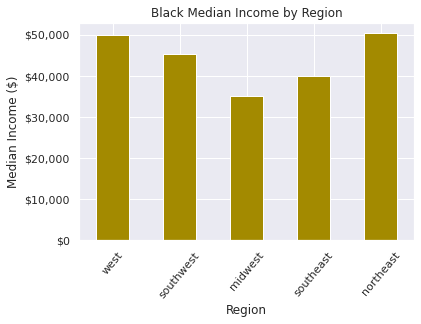

In [112]:
import locale


ax = plt.figure(figsize = (15,5))
ax = black_region.plot(x = "region", y = "black med income ( $) state", kind = "bar", ylabel = "Median Income ($)",
                  xlabel = "Region", title = "Black Median Income by Region", legend = None, color = "#A38A00")
#f = plt.figure()
#f.set_figwidth(8)
#f.set_figheight(2)
fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=50)


#ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


for bar in black_region:
    bar_label = "{:.2f}".format("black med income ( $) state")
#bar_label = f"{:.2f}"

ax.bar_label(ax.containers[0], label_type = "edge")
#s = fmt::format(std::locale("en_US.UTF-8"), "{:L}"

<function matplotlib.pyplot.show(close=None, block=None)>

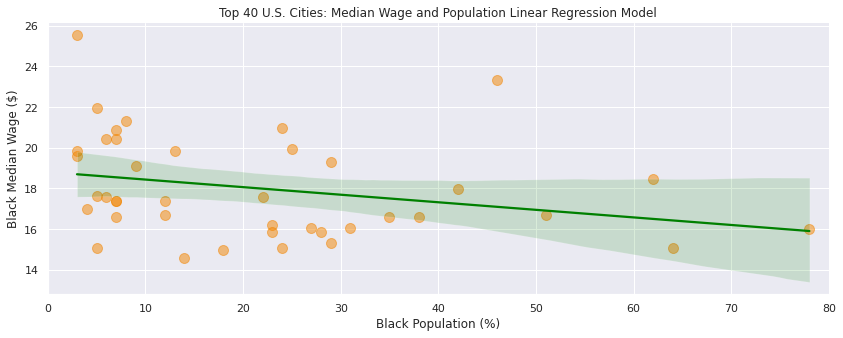

In [9]:
#linear regression for population and median wage
plt.figure(figsize=(14,5))
sns.regplot(x = "black  (%)", y = "black median wage  ($) city", data = black, fit_reg=True, label = black["city"],
            scatter_kws = {"color": "#F28500", "alpha":0.5, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
plt.xlim(0,80)
plt.title("Top 40 U.S. Cities: Median Wage and Population Linear Regression Model")
plt.xlabel("Black Population (%)")
plt.ylabel("Black Median Wage ($)")
#plt.legend(loc = "best")
sns.despine()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

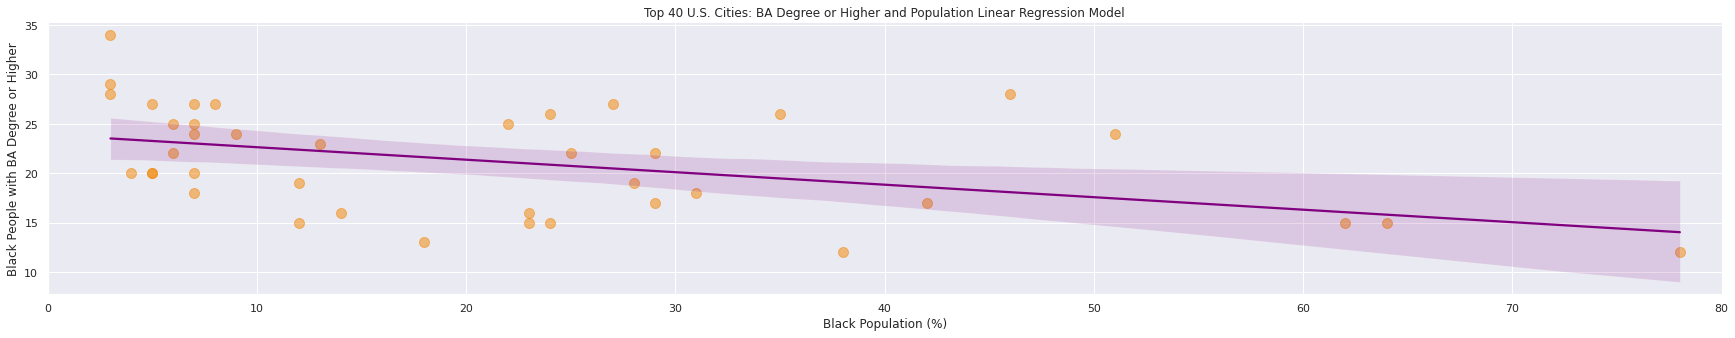

In [39]:
plt.figure(figsize=(30,5))
sns.regplot(x = "black  (%)", y = "blacks with ba degree or higher (%)", data = black, fit_reg=True,
            scatter_kws = {"color": "#F28500", "alpha":0.5, "s":100}, line_kws = {"color": "purple"})
plt.xlim(0,80)
plt.title("Top 40 U.S. Cities: BA Degree or Higher and Population Linear Regression Model")
plt.xlabel("Black Population (%)")
plt.ylabel("Black People with BA Degree or Higher")
sns.despine()
plt.show

(0.0, 70.0)

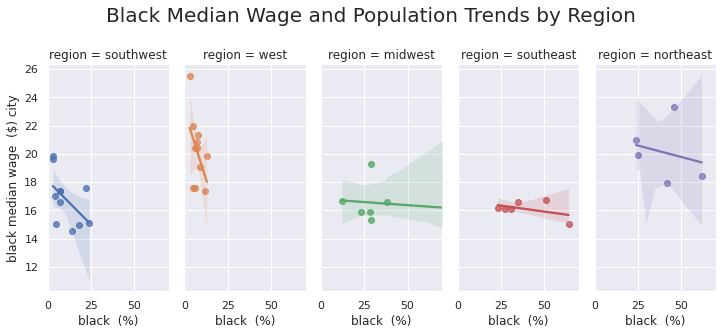

In [51]:
colors = ["#EF7C8E", "#228B22", "#7B3F00", "#FFAE42", "#A668A6"]


ax = sns.lmplot(x = "black  (%)", y = "black median wage  ($) city", hue = "region", col = "region", data = black, 
           height=4, aspect=.5).fig.suptitle("Black Median Wage and Population Trends by Region", y = 1.1, fontsize = 20,
                                      )
#ax = plt.xlabel("Black Population (%)")
#ax = plt.ylabel("Black Median Wage ($)")
plt.xlim(0,70)

(0.0, 70.0)

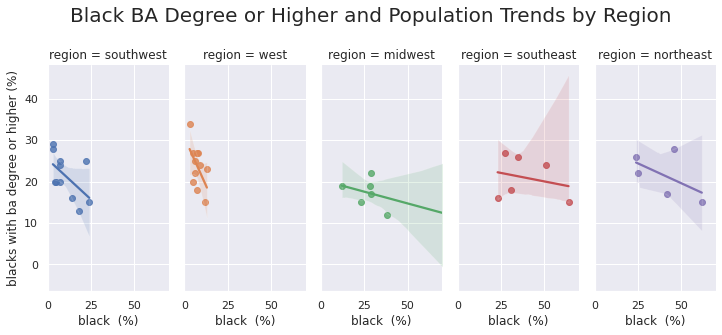

In [52]:
ax = sns.lmplot(x = "black  (%)", y = "blacks with ba degree or higher (%)", hue = "region", col = "region", data = black,
           height=4, aspect=.5).fig.suptitle("Black BA Degree or Higher and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(0,70)

In [97]:
black_west_region = black.loc[black["region"]=="west"]
black_midwest_region = black.loc[black["region"]=="midwest"]
black_southwest_region = black.loc[black["region"]=="southwest"]
black_southeast_region = black.loc[black["region"]=="southeast"]
black_northeast_region = black.loc[black["region"]=="northeast"]

b_west_south = [black_west_region, black_southwest_region]
black_west_south = pd.concat(b_west_south)
black_midwest_region

city   region  black  (%)  unemployed black (%)  \
6         omaha  midwest          12                     7   
4   kansas city  midwest          23                     9   
3  indianapolis  midwest          28                    11   
1      columbus  midwest          29                    10   
0       chicago  midwest          29                    17   
5     milwaukee  midwest          38                    14   
2       detroit  midwest          78                    19   

   black med income ( $) state  black median wage  ($) city  \
6                      35976.0                        16.68   
4                      37179.0                        15.87   
3                      34895.0                        15.87   
1                      33158.0                        15.33   
0                      38573.0                        19.29   
5                      31351.0                        16.59   
2                      35322.0                        16.00   

   blacks with ba degree or higher (%)  graduation rate: black (%)  
6                                   19                          73  
4                                   15                          78  
3                                   19                          82  
1                                   17                          79  
0                                   22                          76  
5                                   12                          71  
2                                   12                          80

[Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '34')]

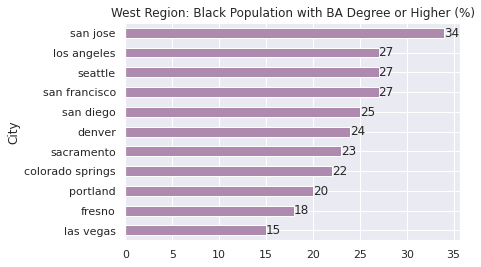

In [60]:
black_west_region = black_west_region.sort_values("blacks with ba degree or higher (%)")

ax = black_west_region.plot(x = "city", y = "blacks with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "West Region: Black Population with BA Degree or Higher (%)",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

[Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '28'),
 Text(0, 0, '29')]

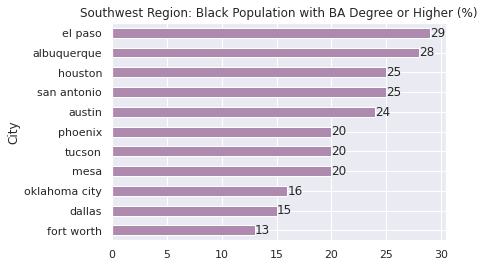

In [15]:
black_southwest_region = black_southwest_region.sort_values("blacks with ba degree or higher (%)")

ax = black_southwest_region.plot(x = "city", y = "blacks with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "Southwest Region: Black Population with BA Degree or Higher (%)",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

In [74]:
b_west_south = [black_west_region, black_southwest_region]
black_west_south = pd.concat(b_west_south)
#black_west_south = black_west_south.sort_values("blacks with ba degree or higher (%)")

In [75]:
b_west_neast = [black_west_region, black_northeast_region]
black_west_neast = pd.concat(b_west_neast)
black_west_neast = black_west_neast.sort_values("blacks with ba degree or higher (%)")

No handles with labels found to put in legend.


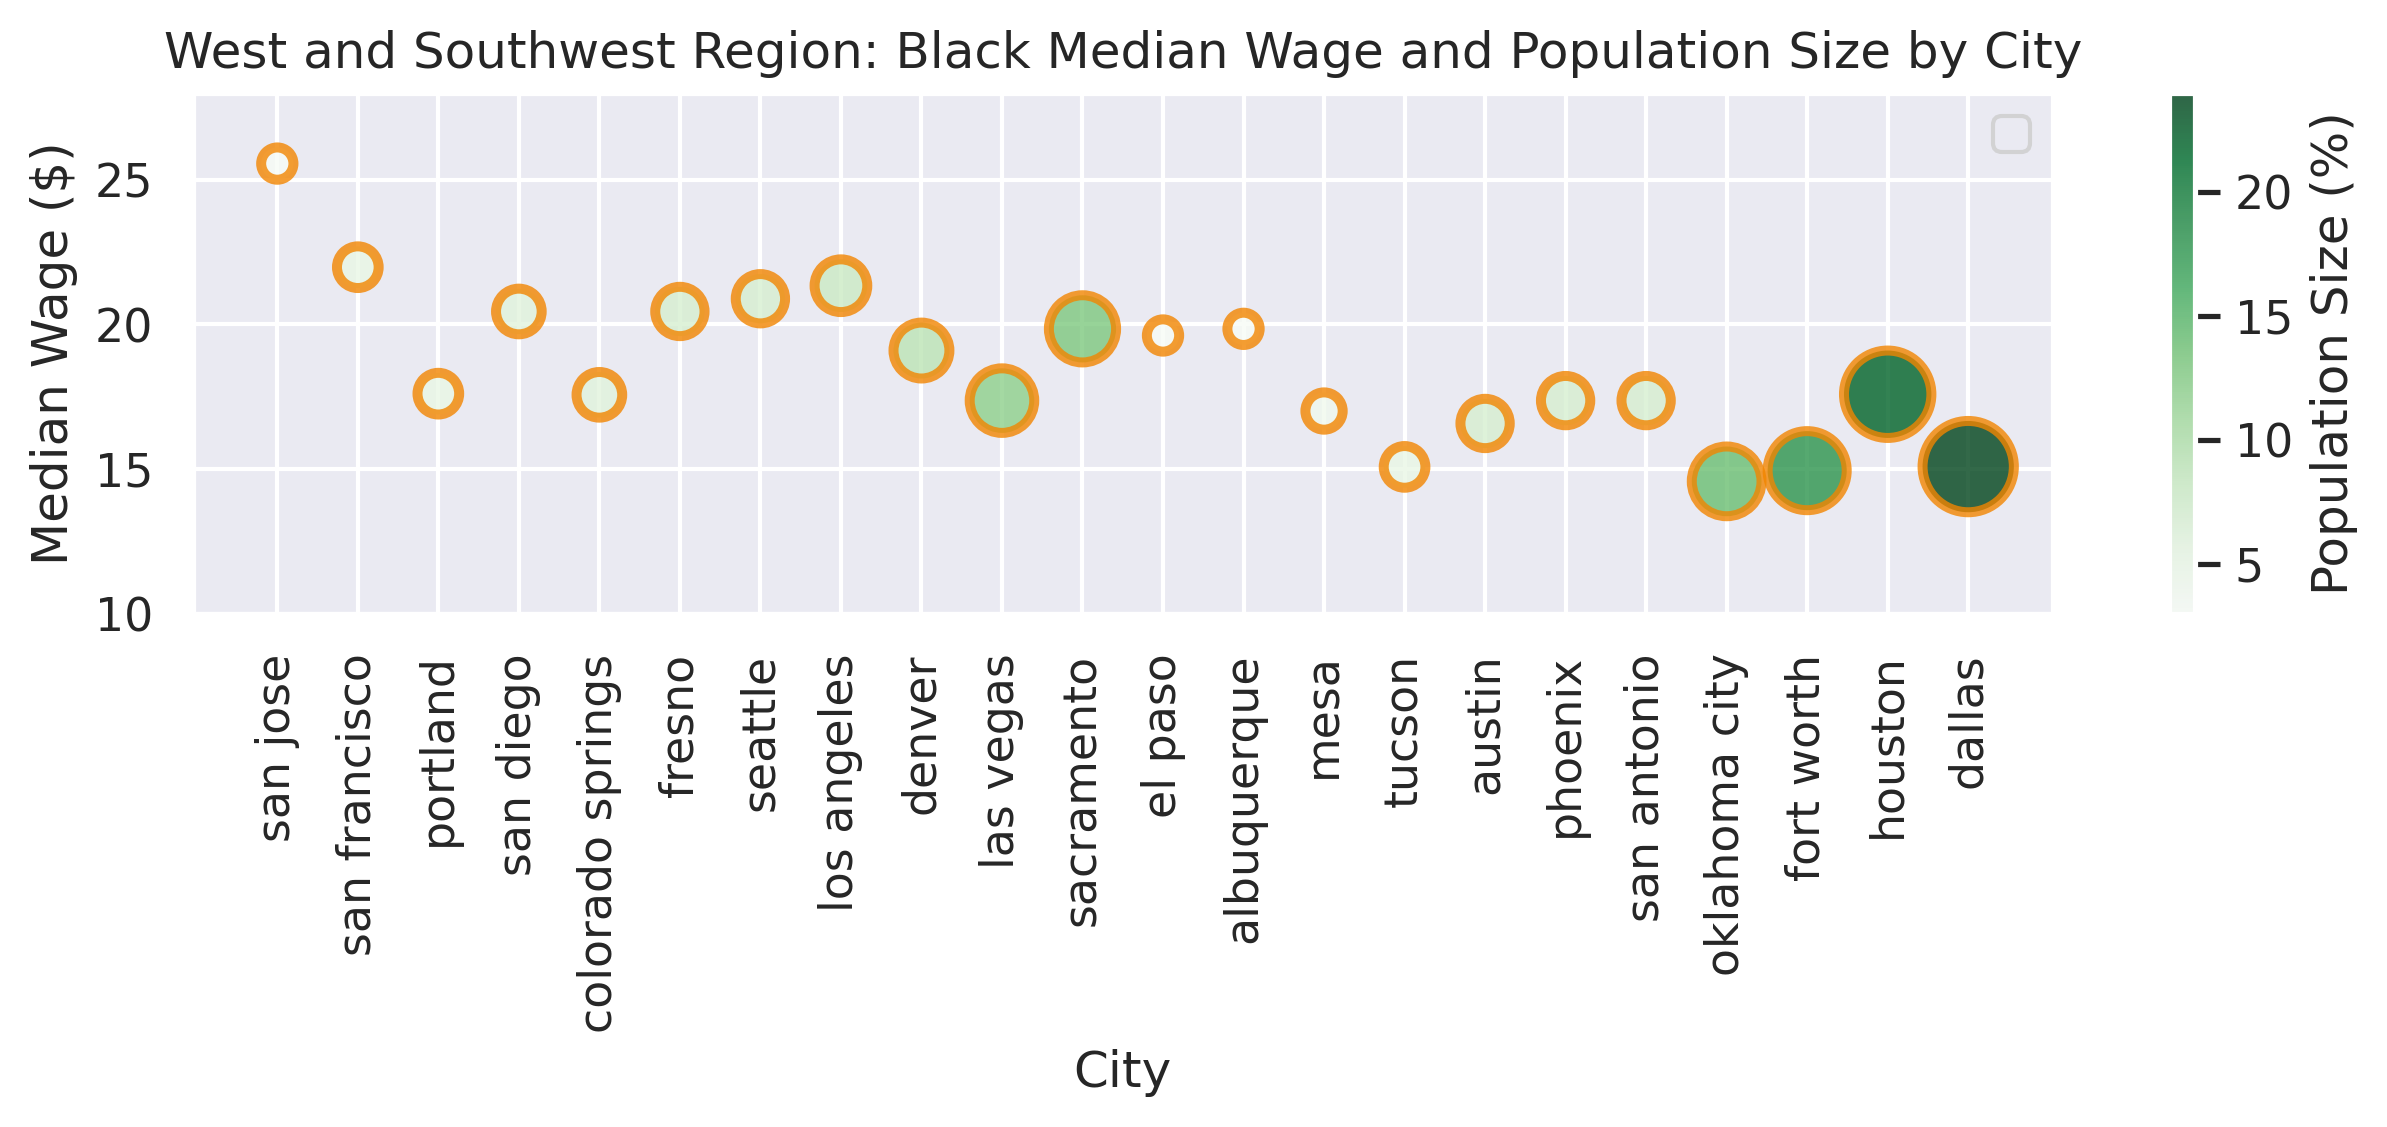

In [76]:


#black_west_south = black_west_south.sort_values("black  (%)")

x = black_west_south["city"]
y = black_west_south["black median wage  ($) city"]
z = black_west_south["black  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 300)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West and Southwest Region: Black Median Wage and Population Size by City")


# show the graph
plt.show()

No handles with labels found to put in legend.


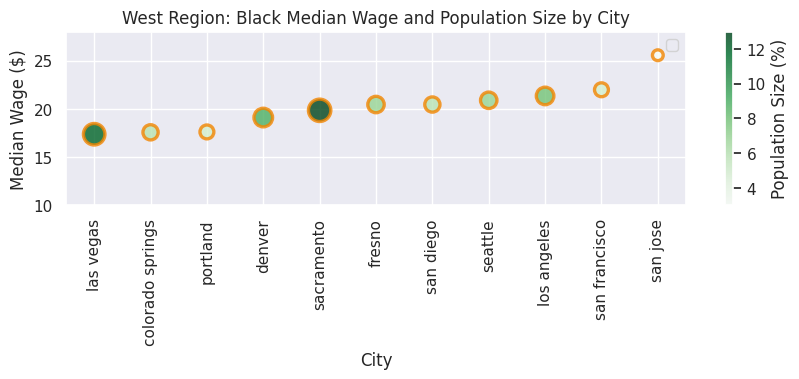

In [56]:

black_west_region = black_west_region.sort_values("black median wage  ($) city")

x = black_west_region["city"]
y = black_west_region["black median wage  ($) city"]
z = black_west_region["black  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 100)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West Region: Black Median Wage and Population Size by City")


# show the graph
plt.show()

No handles with labels found to put in legend.


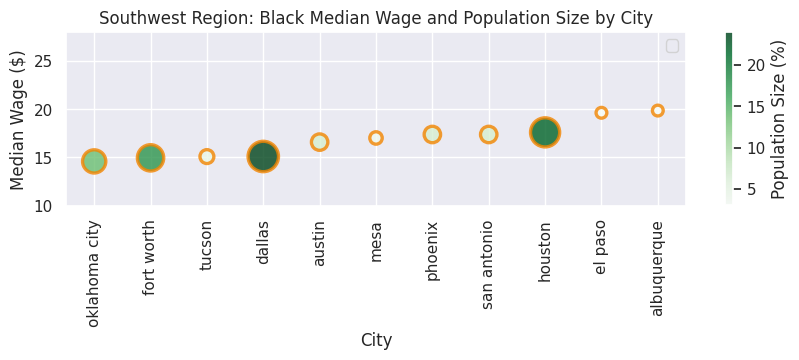

In [61]:
black_southwest_region = black_southwest_region.sort_values("black median wage  ($) city")

x = black_southwest_region["city"]
y = black_southwest_region["black median wage  ($) city"]
z = black_southwest_region["black  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 100)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Southwest Region: Black Median Wage and Population Size by City")


# show the graph
plt.show()

In [20]:
df = px.data.gapminder()
fig = px.scatter_3d(df, x='year', y='continent', z='pop', size='gdpPercap', color='lifeExp',
                    hover_data=['country'])
fig.update_layout(scene_zaxis_type="log")
fig.show()


NameError: name 'px' is not defined

[Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '22')]

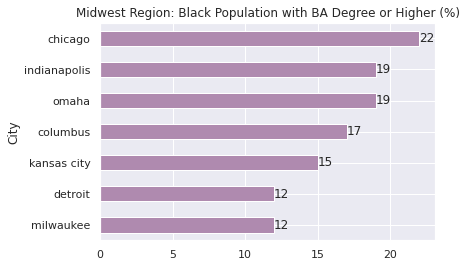

In [21]:
black_midwest_region = black_midwest_region.sort_values("blacks with ba degree or higher (%)")

ax = black_midwest_region.plot(x = "city", y = "blacks with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "Midwest Region: Black Population with BA Degree or Higher (%)",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

Text(0.4, 1.05, 'Midwest Region: Black Median Wage and Population Trends by City')

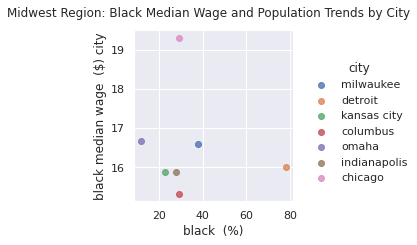

In [22]:
sns.lmplot(x = "black  (%)", y = "black median wage  ($) city", hue = "city", data = black_midwest_region,
           height=3, aspect=1).fig.suptitle("Midwest Region: Black Median Wage and Population Trends by City", y = 1.05, x= 0.4, fontsize = 12)

No handles with labels found to put in legend.


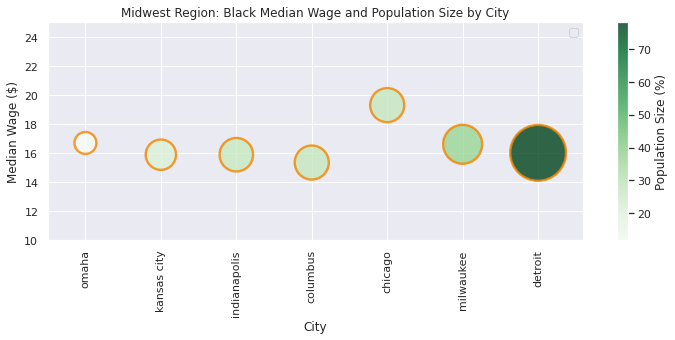

In [94]:
black_midwest_region = black_midwest_region.sort_values("black  (%)")


x = black_midwest_region["city"]
y = black_midwest_region["black median wage  ($) city"]
z = black_midwest_region["black  (%)"]



# use the scatter function
plt.figure(figsize = (12,4))
plt.scatter(x, y, s=z*40, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.xlim(-0.5, 6.6)
plt.ylim(10, 25)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Midwest Region: Black Median Wage and Population Size by City")


# show the graph
plt.show()

In [98]:
b_south_north = [black_southeast_region, black_northeast_region]
black_northsouth_east = pd.concat(b_south_north)

[Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '22'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28')]

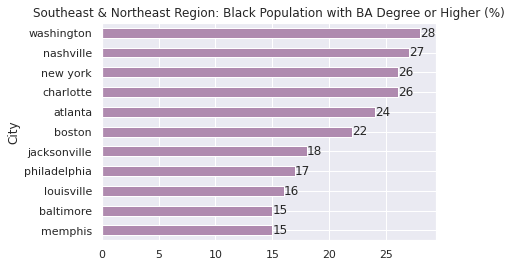

In [25]:
black_northsouth_east = black_northsouth_east.sort_values("blacks with ba degree or higher (%)")

ax = black_northsouth_east.plot(x = "city", y = "blacks with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "Southeast & Northeast Region: Black Population with BA Degree or Higher (%)",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

In [100]:
black_northsouth_east

city     region  black  (%)  unemployed black (%)  \
15    louisville  southeast          23                    12   
17     nashville  southeast          27                     6   
14  jacksonville  southeast          31                    10   
13     charlotte  southeast          35                    10   
12       atlanta  southeast          51                    13   
16       memphis  southeast          64                    12   
9       new york  northeast          24                    10   
8         boston  northeast          25                     9   
10  philadelphia  northeast          42                    12   
11    washington  northeast          46                    13   
7      baltimore  northeast          62                    11   

    black med income ( $) state  black median wage  ($) city  \
15                      36424.0                        16.19   
17                      38791.0                        16.07   
14                      41702.0                        16.07   
13                      39108.0                        16.59   
12                      44670.0                        16.71   
16                      38791.0                        15.07   
9                       48557.0                        20.98   
8                       51842.0                        19.91   
10                      38560.0                        17.95   
11                      45072.0                        23.31   
7                       67583.0                        18.45   

    blacks with ba degree or higher (%)  graduation rate: black (%)  
15                                   16                          87  
17                                   27                          74  
14                                   18                          94  
13                                   26                          86  
12                                   24                          83  
16                                   15                          72  
9                                    26                          74  
8                                    22                          69  
10                                   17                          71  
11                                   28                          75  
7                                    15                          82

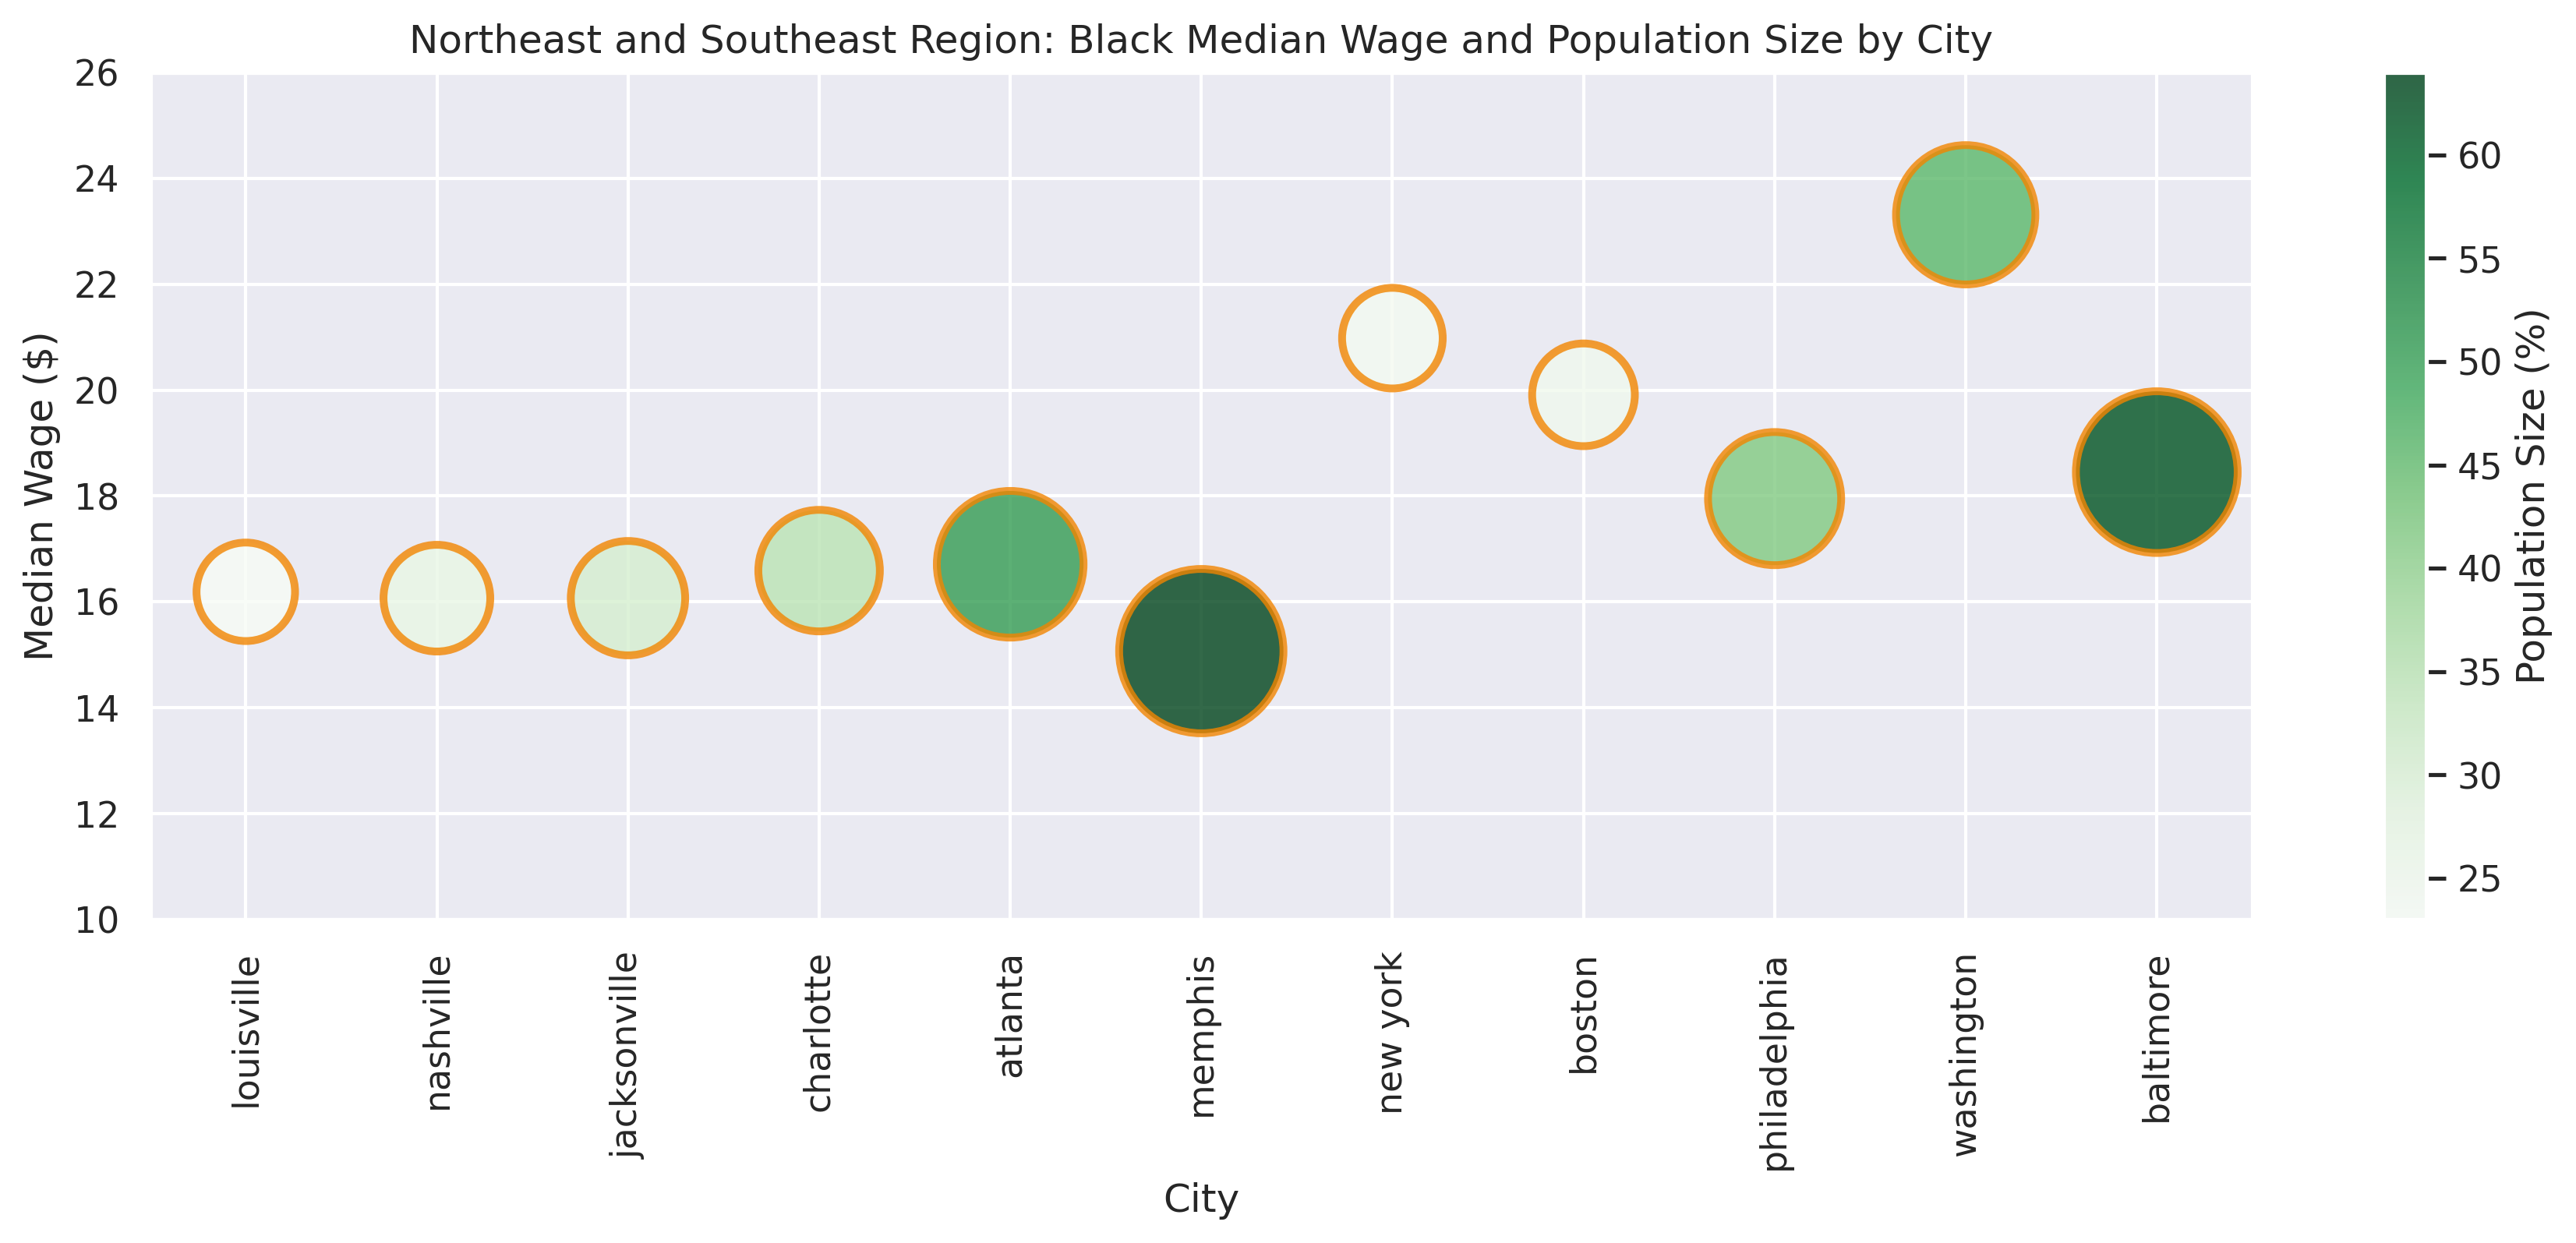

In [99]:
#black_northsouth_east = black_northsouth_east.sort_values("black  (%)")

x = black_northsouth_east["city"]
y = black_northsouth_east["black median wage  ($) city"]
z = black_northsouth_east["black  (%)"]



# use the scatter function
plt.figure(figsize = (14.5,4.8), dpi = 300)
plt.scatter(x, y, s=z*40, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 26)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
#plt.legend()

plt.title("Northeast and Southeast Region: Black Median Wage and Population Size by City")

# show the graph
plt.show()

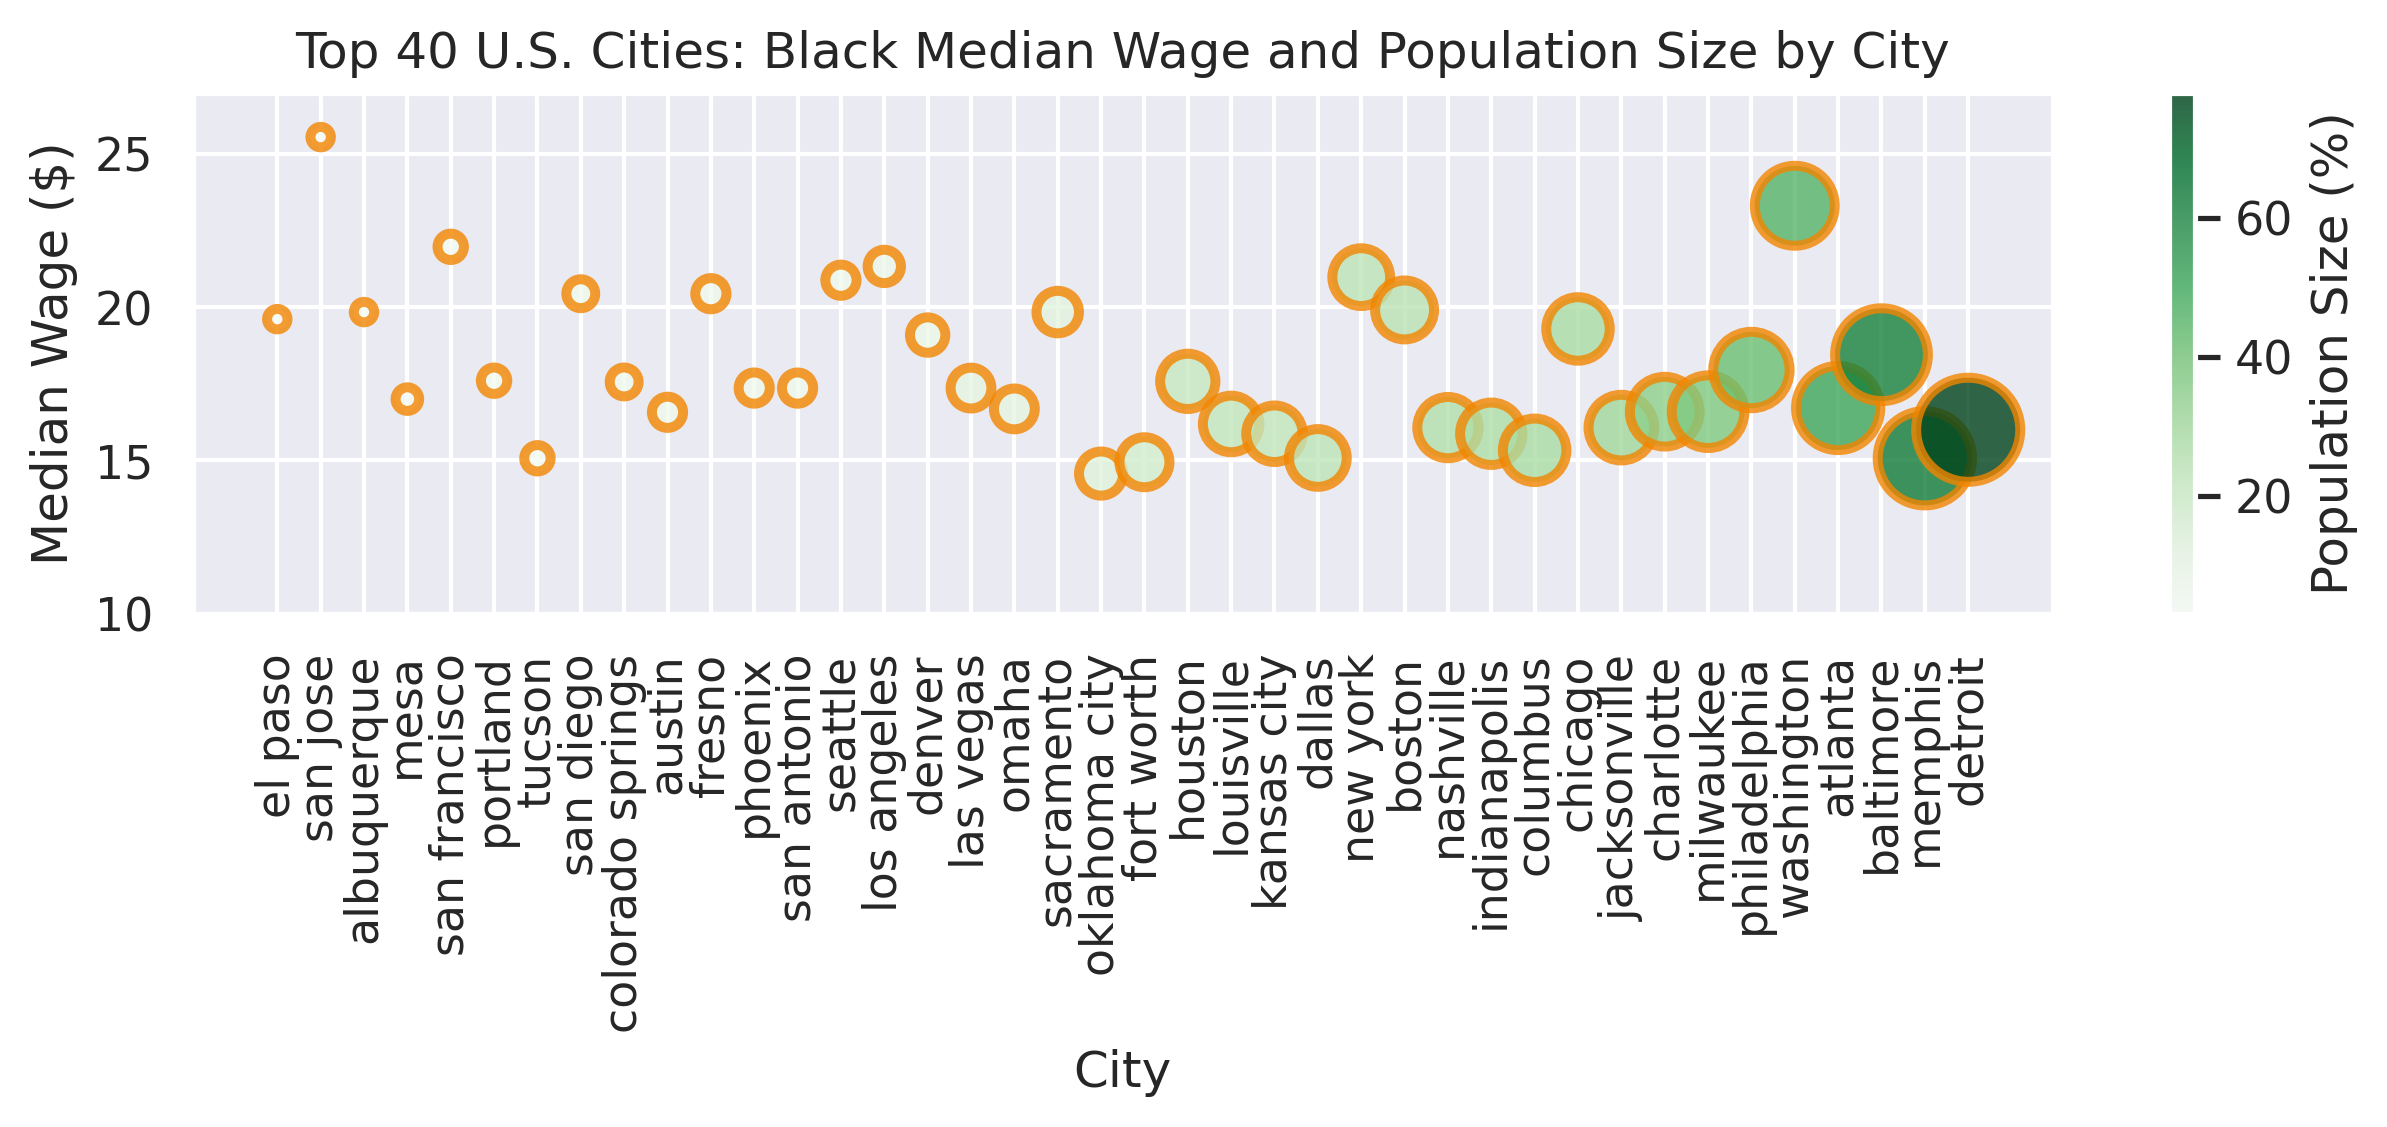

In [27]:
#black_northsouth_east = black_northsouth_east.sort_values("black  (%)")

x = black["city"]
y = black["black median wage  ($) city"]
z = black["black  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 300)
plt.scatter(x, y, s=z*8, alpha=0.8, c = z, edgecolors = "#F28500", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 27)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
#plt.legend()

plt.title("Top 40 U.S. Cities: Black Median Wage and Population Size by City")

# show the graph
plt.show()

# HISPANIC AND LATINO DEMOGRAPHIC

In [101]:
lat = lat_cols.sort_values("hisp_lat  (%)")
lat_region = lat.groupby(["region"]).mean("race")
lat_region.reset_index(inplace=True)
lat_region["hispanic med income ( $) state"] = lat_region["hispanic med income ( $) state"].apply(np.ceil)
lat_region = lat_region.sort_values("hisp_lat  (%)")
lat_region

region  hisp_lat  (%)  unemployed latino (%)  \
2  southeast       8.333333               5.000000   
1  northeast      15.600000               7.600000   
0    midwest      16.142857               6.714286   
4       west      26.818182               6.181818   
3  southwest      43.545455               5.545455   

   hispanic med income ( $) state  latino median wage  ($) city  \
2                         45523.0                     14.171667   
1                         57951.0                     18.090000   
0                         48489.0                     13.837143   
4                         56325.0                     17.442727   
3                         48058.0                     14.606364   

   latinos with ba degree or higher (%)  graduation rate: hispanic (%)  
2                             21.333333                      75.166667  
1                             26.000000                      68.600000  
0                             11.428571                      75.428571  
4                             20.090909                      85.545455  
3                             13.636364                      84.545455

[Text(0, 0, '45523'),
 Text(0, 0, '57951'),
 Text(0, 0, '48489'),
 Text(0, 0, '56325'),
 Text(0, 0, '48058')]

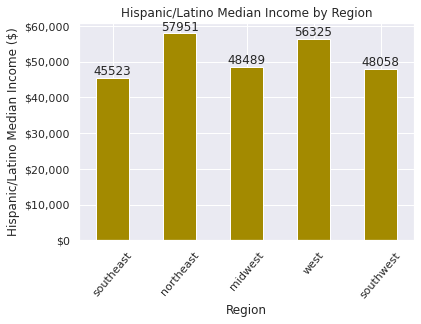

In [32]:
ax = lat_region.plot(x = "region", y = "hispanic med income ( $) state", kind = "bar", ylabel = "Hispanic/Latino Median Income ($)",
                  xlabel = "Region", title = "Hispanic/Latino Median Income by Region", legend = None, color = "#A38A00")
fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=50)



#for bar in df["black med income ( $) state"]:
    #plt.text(bar.format(int(x), ','), yval + .005, yval)
#comma_fmt = ticker(lambda x, p: format(int(x), ','))
ax.bar_label(ax.containers[0], label_type = "edge")

<function matplotlib.pyplot.show(close=None, block=None)>

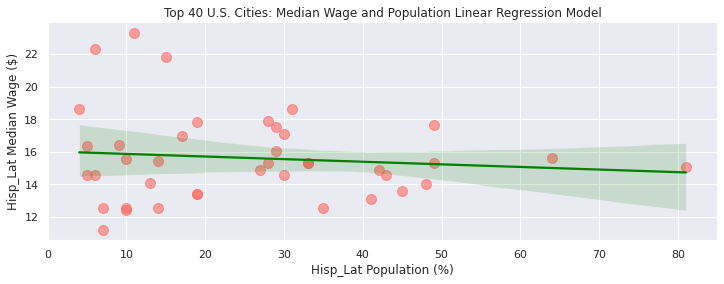

In [33]:
#linear regression for population and median wage
plt.figure(figsize=(12,4))
sns.regplot(x = "hisp_lat  (%)", y = "latino median wage  ($) city", data = lat, fit_reg=True, label = lat["city"],
            scatter_kws = {"color": "#FF6961", "alpha":0.6, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
plt.xlim(0,85)
plt.title("Top 40 U.S. Cities: Median Wage and Population Linear Regression Model")
plt.xlabel("Hisp_Lat Population (%)")
plt.ylabel("Hisp_Lat Median Wage ($)")
#plt.legend(loc = "best")
sns.despine()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

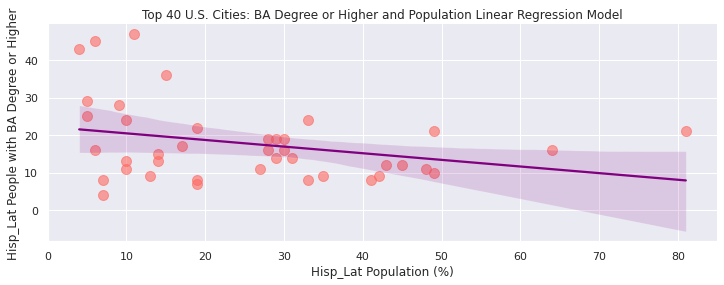

In [34]:
#linear regression for ba degree and median wage
plt.figure(figsize=(12,4))
sns.regplot(x = "hisp_lat  (%)", y = "latinos with ba degree or higher (%)", data = lat, fit_reg=True, label = lat["city"],
            scatter_kws = {"color": "#FF6961", "alpha":0.6, "s":100 },
            line_kws = {"color": "purple"}) #"label": "regression line"})
plt.xlim(0,85)
plt.title("Top 40 U.S. Cities: BA Degree or Higher and Population Linear Regression Model")
plt.xlabel("Hisp_Lat Population (%)")
plt.ylabel("Hisp_Lat People with BA Degree or Higher")
#plt.legend(loc = "best")
sns.despine()
plt.show

(0.0, 85.0)

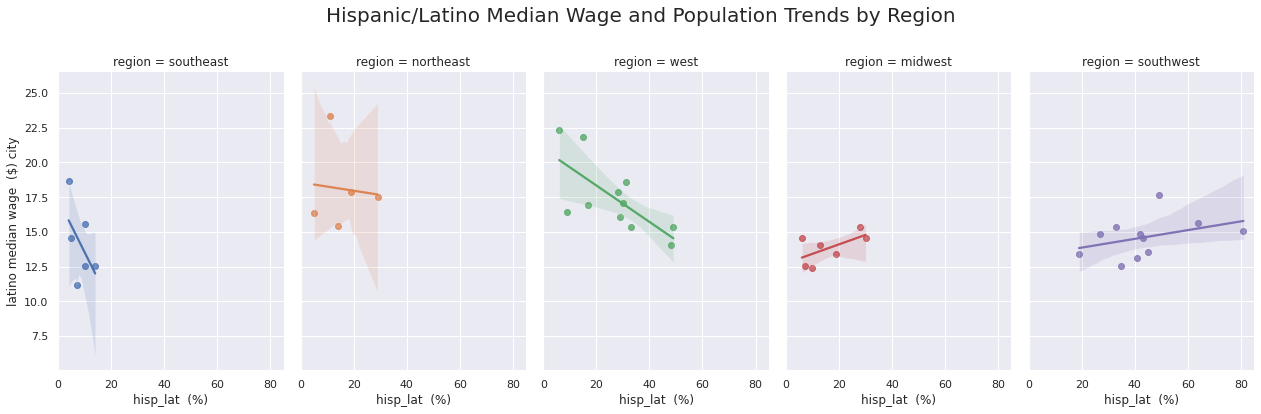

In [35]:
colors = ["#EF7C8E", "#228B22", "#7B3F00", "#FFAE42", "#A668A6"]


ax = sns.lmplot(x = "hisp_lat  (%)", y = "latino median wage  ($) city", hue = "region", col = "region", data = lat, 
           height=5, aspect=.7).fig.suptitle("Hispanic/Latino Median Wage and Population Trends by Region", y = 1.1, fontsize = 20)
#ax = plt.xlabel("Black Population (%)")
#ax = plt.ylabel("Black Median Wage ($)")
plt.xlim(0,85)

(0.0, 85.0)

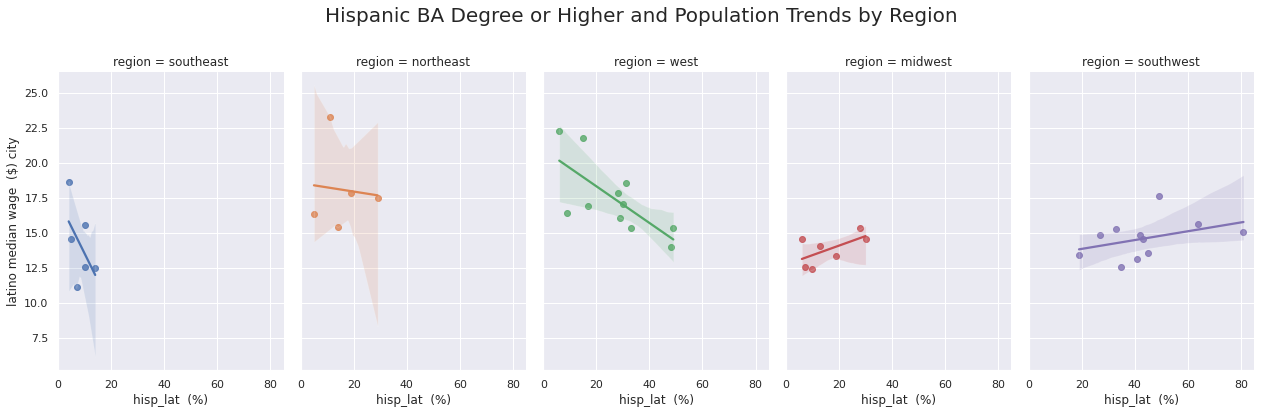

In [36]:
ax = sns.lmplot(x = "hisp_lat  (%)", y = "latino median wage  ($) city", hue = "region", col = "region", data = lat,
           height=5, aspect=.7).fig.suptitle("Hispanic BA Degree or Higher and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(0,85)

In [128]:
lat_west_region = lat.loc[lat["region"]=="west"]
lat_midwest_region = lat.loc[lat["region"]=="midwest"]
lat_southwest_region = lat.loc[lat["region"]=="southwest"]
lat_southeast_region = lat.loc[lat["region"]=="southeast"]
lat_northeast_region = lat.loc[lat["region"]=="northeast"]

lwest_north = [lat_west_region, lat_northeast_region]
lat_west_north = pd.concat(lwest_north)
lat_west_north = lat_west_north.sort_values("latino median wage  ($) city")
lat_west_north

city                 state     region  hisp_lat  (%)  \
33       los angeles            california       west             48   
32         las vegas                nevada       west             33   
31            fresno            california       west             49   
10      philadelphia          pennsylvania  northeast             14   
30            denver              colorado       west             29   
7          baltimore              maryland  northeast              5   
34          portland                oregon       west              9   
29  colorado springs              colorado       west             17   
36         san diego            california       west             30   
9           new york              new york  northeast             29   
8             boston         massachusetts  northeast             19   
35        sacramento            california       west             28   
38          san jose            california       west             31   
37     san francisco            california       west             15   
39           seattle            washington       west              6   
11        washington  district of columbia  northeast             11   

    unemployed latino (%)  hispanic med income ( $) state  \
33                      6                         58703.0   
32                      6                         51995.0   
31                      9                         58703.0   
10                     11                         41725.0   
30                      5                         53929.0   
7                       6                         72758.0   
34                      6                         52537.0   
29                      6                         53929.0   
36                      8                         58703.0   
9                       8                         49159.0   
8                       8                         44885.0   
35                      6                         58703.0   
38                      7                         58703.0   
37                      5                         58703.0   
39                      4                         54962.0   
11                      5                         81227.0   

    latino median wage  ($) city  latinos with ba degree or higher (%)  \
33                         14.02                                    11   
32                         15.33                                     8   
31                         15.33                                    10   
10                         15.42                                    13   
30                         16.07                                    14   
7                          16.35                                    29   
34                         16.44                                    28   
29                         16.96                                    17   
36                         17.10                                    19   
9                          17.52                                    19   
8                          17.85                                    22   
35                         17.88                                    19   
38                         18.60                                    14   
37                         21.82                                    36   
39                         22.32                                    45   
11                         23.31                                    47   

    graduation rate: hispanic (%)  
33                             84  
32                             91  
31                             94  
10                             65  
30                             79  
7                              71  
34                             80  
29                             84  
36                             91  
9                              75  
8                              67  
35                             91  
38                        

In [103]:
#West and Northeast Region BA Degrees

lat_west_north = lat_west_north.sort_values("latinos with ba degree or higher (%)")

ax = lat_west_north.plot(x = "city", y = "latinos with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "West and Northeast Region: Hispanic and Latino BA Degrees Degrees or Higher",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

NameError: name 'lat_west_north' is not defined

No handles with labels found to put in legend.


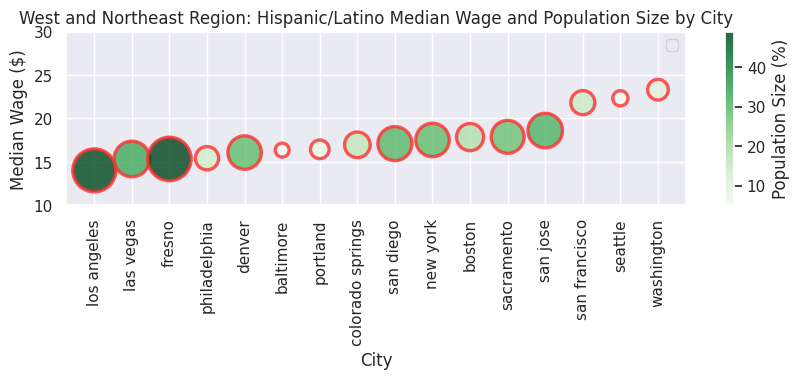

In [127]:
#West and Northeast Region Median Wage and Population Size
lat_west_north = lat_west_north.sort_values("latino median wage  ($) city")


x = lat_west_north["city"]
y = lat_west_north["latino median wage  ($) city"]
z = lat_west_north["hisp_lat  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 100)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#FF2E2E", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 30)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West and Northeast Region: Hispanic/Latino Median Wage and Population Size by City")

# show the graph
plt.show()

No handles with labels found to put in legend.


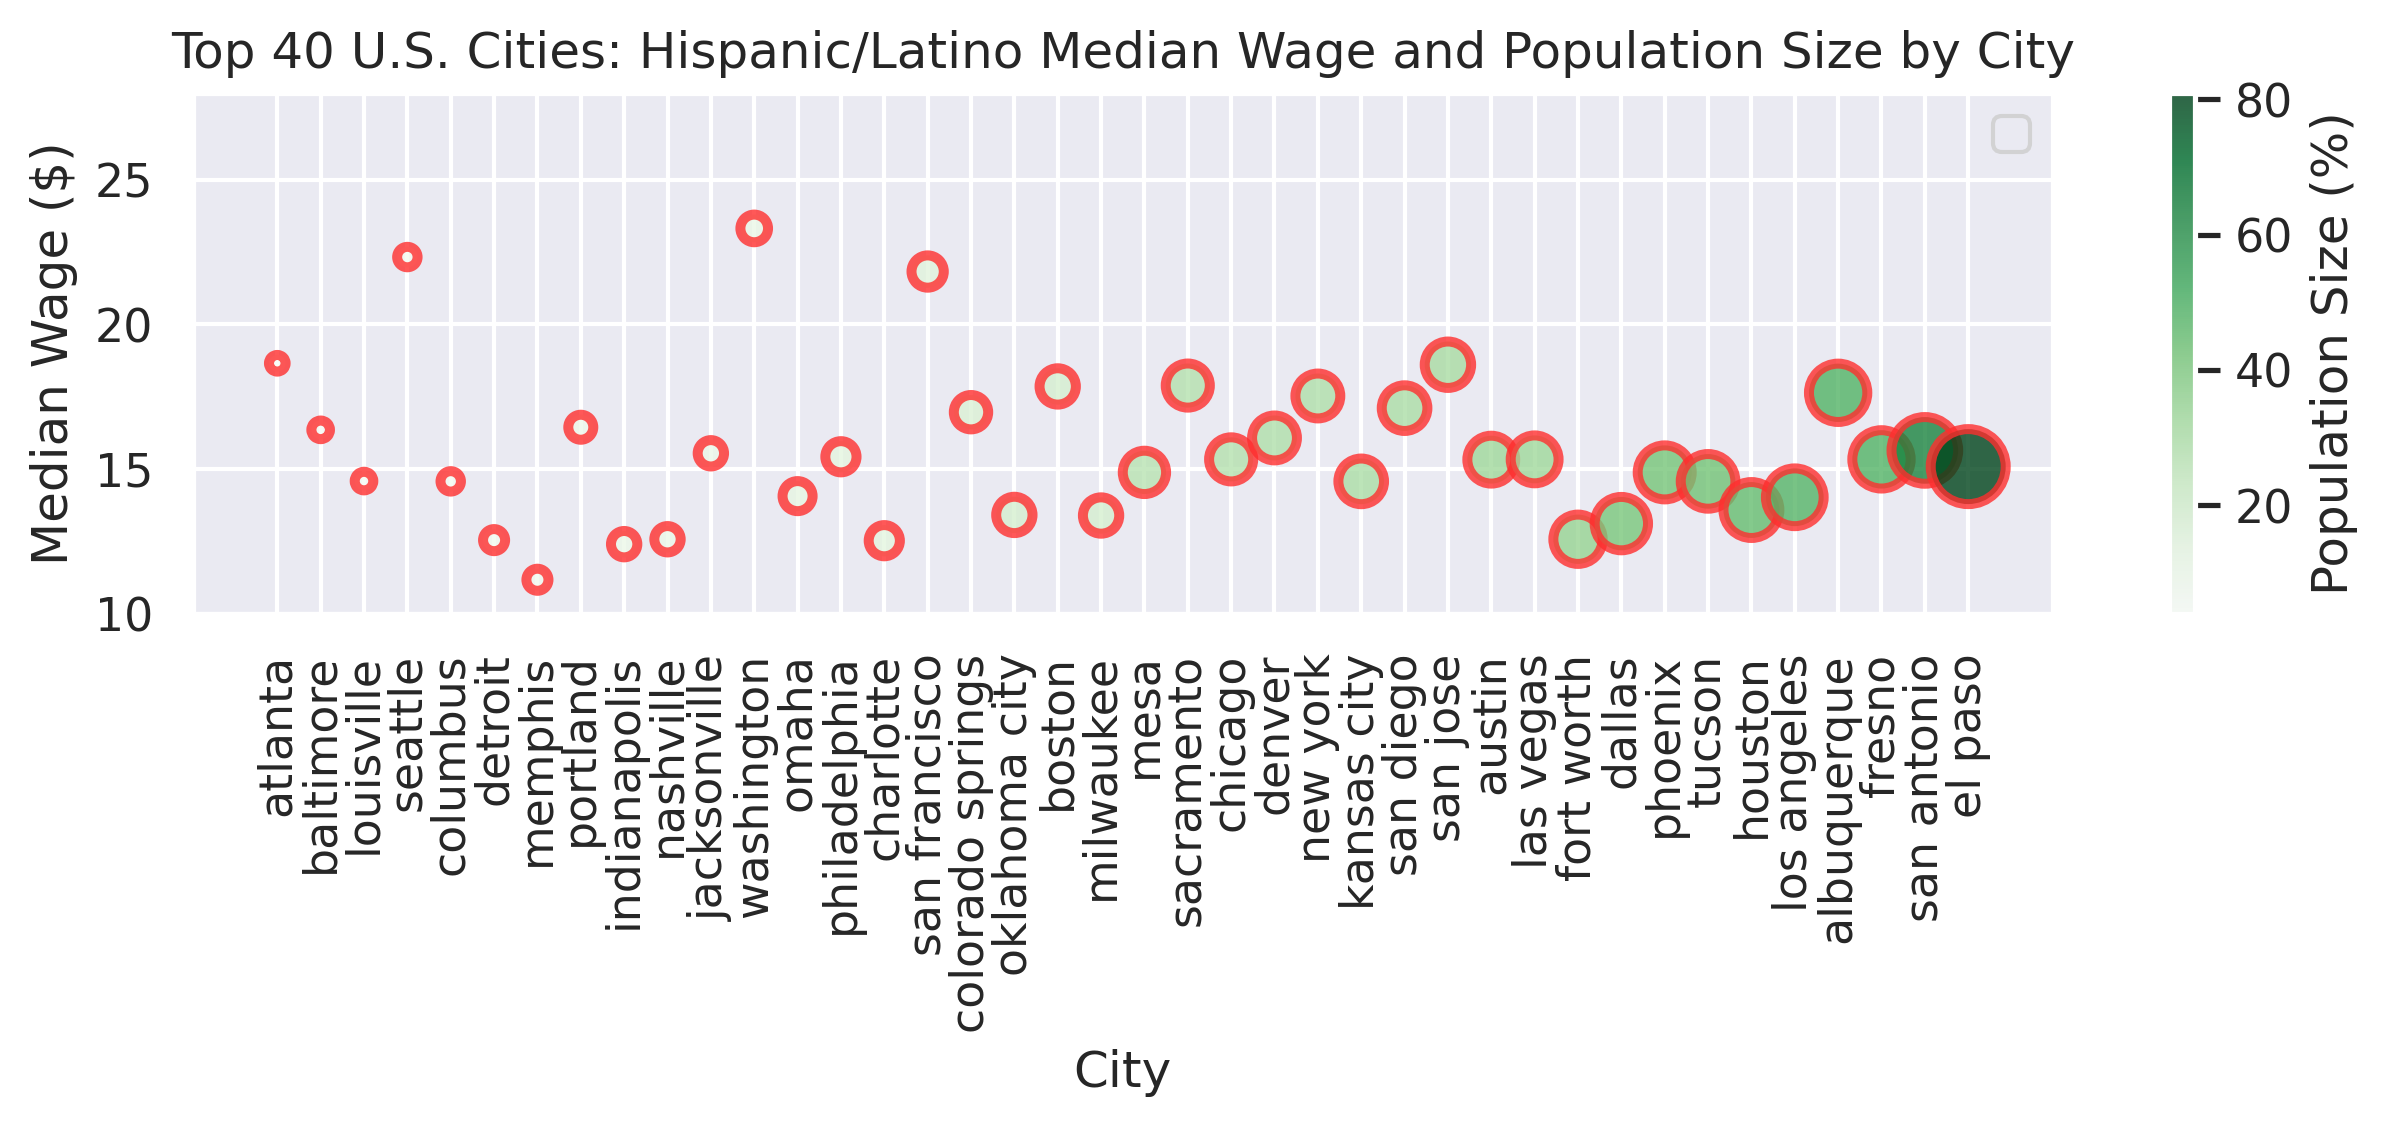

In [109]:
#West and Northeast Region Median Wage and Population Size

x = lat["city"]
y = lat["latino median wage  ($) city"]
z = lat["hisp_lat  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 300)
plt.scatter(x, y, s=z*4, alpha=0.8, c = z, edgecolors = "#FF2E2E", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Top 40 U.S. Cities: Hispanic/Latino Median Wage and Population Size by City")

# show the graph
plt.show()

[Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '21'),
 Text(0, 0, '21'),
 Text(0, 0, '24')]

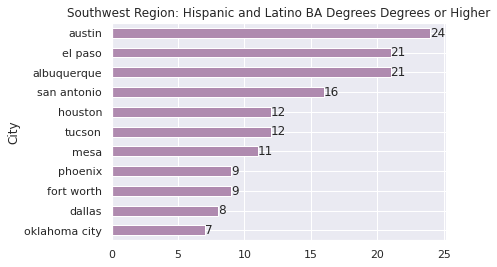

In [110]:
#Southwest Region BA Degrees

lat_southwest_region = lat_southwest_region.sort_values("latinos with ba degree or higher (%)")

ax = lat_southwest_region.plot(x = "city", y = "latinos with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree (%)", xlabel = "City", title = "Southwest Region: Hispanic and Latino BA Degrees Degrees or Higher",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

In [119]:
lat_southwest_region

city       state     region  hisp_lat  (%)  \
24           mesa     arizona  southwest             27   
28        phoenix     arizona  southwest             42   
27         tucson     arizona  southwest             43   
18    albuquerque  new mexico  southwest             49   
25  oklahoma city    oklahoma  southwest             19   
19         austin       texas  southwest             33   
22     fort worth       texas  southwest             35   
20         dallas       texas  southwest             41   
23        houston       texas  southwest             45   
26    san antonio       texas  southwest             64   
21        el paso       texas  southwest             81   

    unemployed latino (%)  hispanic med income ( $) state  \
24                      6                         48649.0   
28                      6                         48649.0   
27                      8                         48649.0   
18                      6                         42421.0   
25                      4                         44709.0   
19                      4                         49260.0   
22                      7                         49260.0   
20                      4                         49260.0   
23                      4                         49260.0   
26                      6                         49260.0   
21                      6                         49260.0   

    latino median wage  ($) city  latinos with ba degree or higher (%)  \
24                         14.88                                    11   
28                         14.88                                     9   
27                         14.57                                    12   
18                         17.63                                    21   
25                         13.41                                     7   
19                         15.32                                    24   
22                         12.57                                     9   
20                         13.11                                     8   
23                         13.58                                    12   
26                         15.64                                    16   
21                         15.08                                    21   

    graduation rate: hispanic (%)  
24                             75  
28                             82  
27                             77  
18                             70  
25                             81  
19                             96  
22                             92  
20                             89  
23                             87  
26                             91  
21                             90

No handles with labels found to put in legend.


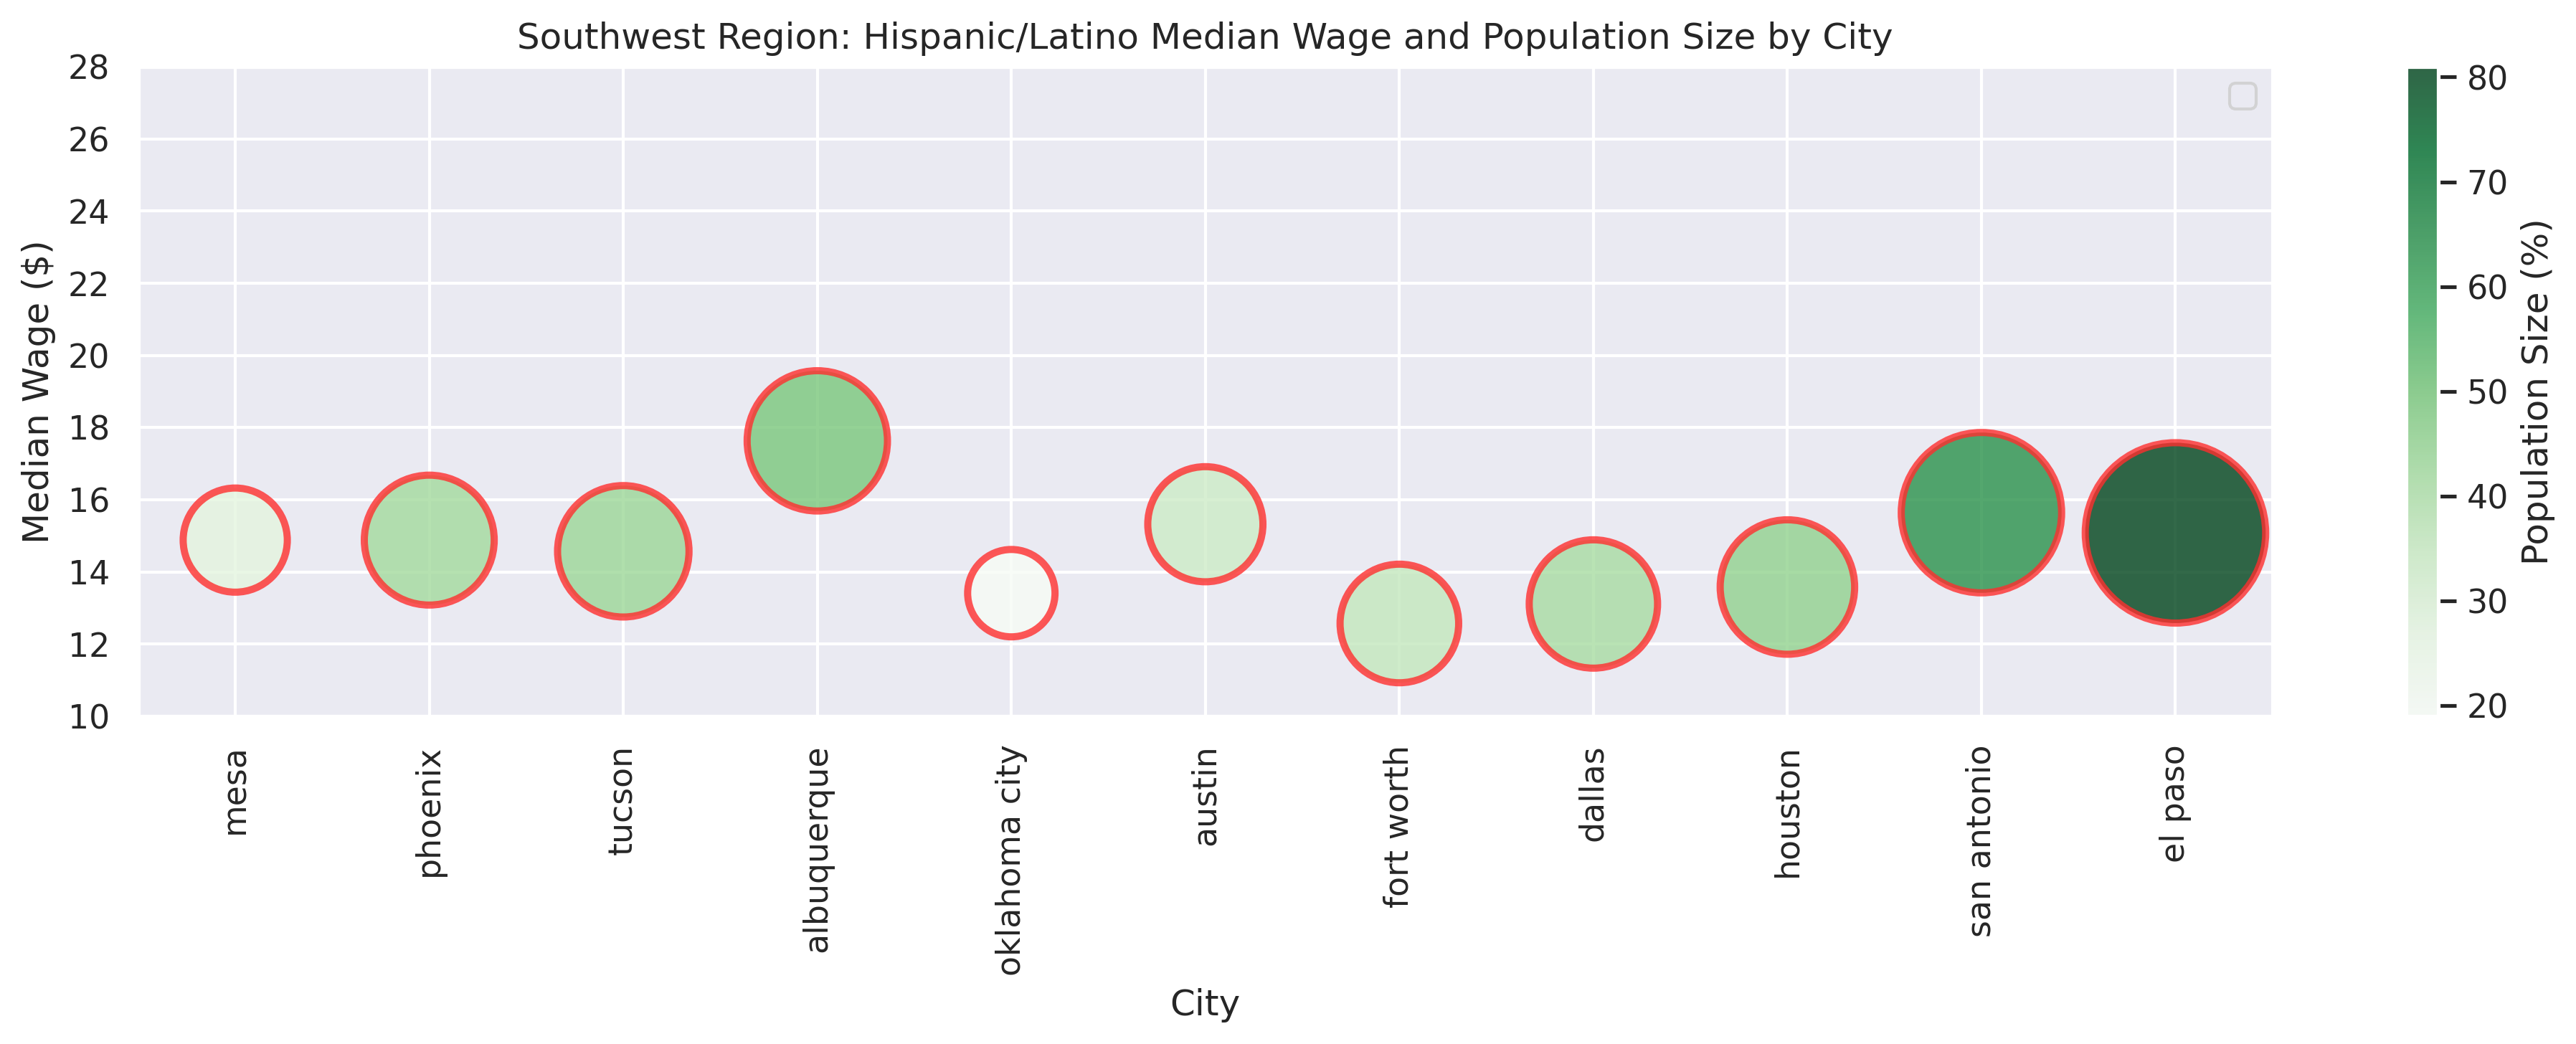

In [124]:
#West and Northeast Region Median Wage and Population Size

lat_southwest_region = lat_southwest_region.sort_values("state")

x = lat_southwest_region["city"]
y = lat_southwest_region["latino median wage  ($) city"]
z = lat_southwest_region["hisp_lat  (%)"]



# use the scatter function
plt.figure(figsize = (16,4), dpi = 300)
plt.scatter(x, y, s=z*45, alpha=0.8, c = z, edgecolors = "#FF2E2E", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 28)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Southwest Region: Hispanic/Latino Median Wage and Population Size by City")

# show the graph
plt.show()

# ASIAN DEMOGRAPHIC

In [138]:
asian_cols = asian_cols.loc[asian_cols["asian median wage  ($) city"] != "#NULL!"]

asian_cols["asian median wage  ($) city"] = pd.to_numeric(asian_cols["asian median wage  ($) city"])
#asian_cols = asian_cols.astype({"asian median wage  ($) city": int})

asian = asian_cols.sort_values("asian  (%)")
asian_region = asian.groupby(["region"]).mean("race")
asian_region["asian med income ( $) state"] = asian_region["asian med income ( $) state"].apply(np.ceil)
asian_region.reset_index(inplace=True)
asian_region

region  asian  (%)  unemployed asian (%)  asian med income ( $) state  \
0    midwest    4.166667              4.000000                      71488.0   
1  northeast    7.200000              4.800000                      92350.0   
2  southeast    3.333333              3.500000                      75849.0   
3  southwest    3.300000              4.500000                      80402.0   
4       west   14.636364              5.272727                      89730.0   

   asian median wage  ($) city  asians with ba degree or higher (%)  \
0                    18.188333                            46.333333   
1                    24.580000                            59.000000   
2                    23.153333                            58.000000   
3                    23.720000                            54.000000   
4                    23.637273                            46.636364   

   graduation rate: asian (%)  
0                   77.833333  
1                   81.600000  
2                   81.833333  
3                   84.200000  
4                   88.454545

[Text(0, 0, '71488'),
 Text(0, 0, '92350'),
 Text(0, 0, '75849'),
 Text(0, 0, '80402'),
 Text(0, 0, '89730')]

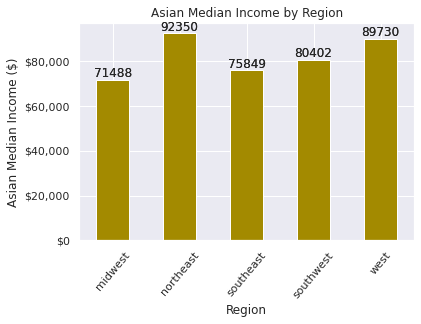

In [139]:

ax = asian_region.plot(x = "region", y = "asian med income ( $) state", kind = "bar", ylabel = "Asian Median Income ($)",
                  xlabel = "Region", title = "Asian Median Income by Region", legend = None, color = "#A38A00")
ax.bar_label(ax.containers[0], label_type = "edge")
fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=50)



#for bar in df["black med income ( $) state"]:
    #plt.text(bar.format(int(x), ','), yval + .005, yval)
#comma_fmt = ticker(lambda x, p: format(int(x), ','))
ax.bar_label(ax.containers[0], label_type = "edge")

<function matplotlib.pyplot.show(close=None, block=None)>

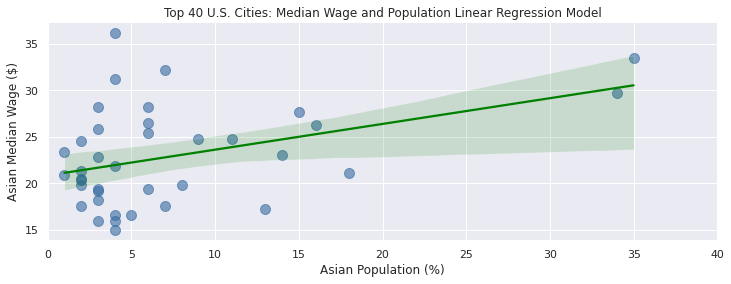

In [140]:
#linear regression for population and median wage
plt.figure(figsize=(12,4))
sns.regplot(x = "asian  (%)", y = "asian median wage  ($) city", data = asian, fit_reg=True, label = asian["city"],
            scatter_kws = {"color": "#366BA1", "alpha":0.6, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
plt.xlim(0,40)
plt.title("Top 40 U.S. Cities: Median Wage and Population Linear Regression Model")
plt.xlabel("Asian Population (%)")
plt.ylabel("Asian Median Wage ($)")
#plt.legend(loc = "best")
sns.despine()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

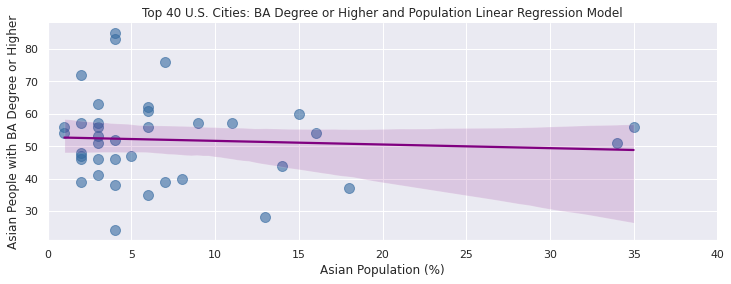

In [141]:
#linear regression for ba degree and median wage
plt.figure(figsize=(12,4))
sns.regplot(x = "asian  (%)", y = "asians with ba degree or higher (%)", data = asian, fit_reg=True, label = asian["city"],
            scatter_kws = {"color": "#366BA1", "alpha":0.6, "s":100 },
            line_kws = {"color": "purple"}) #"label": "regression line"})
plt.xlim(0,40)
plt.title("Top 40 U.S. Cities: BA Degree or Higher and Population Linear Regression Model")
plt.xlabel("Asian Population (%)")
plt.ylabel("Asian People with BA Degree or Higher")
#plt.legend(loc = "best")
sns.despine()
plt.show

(4.180451098956212, 44.691407090525836)

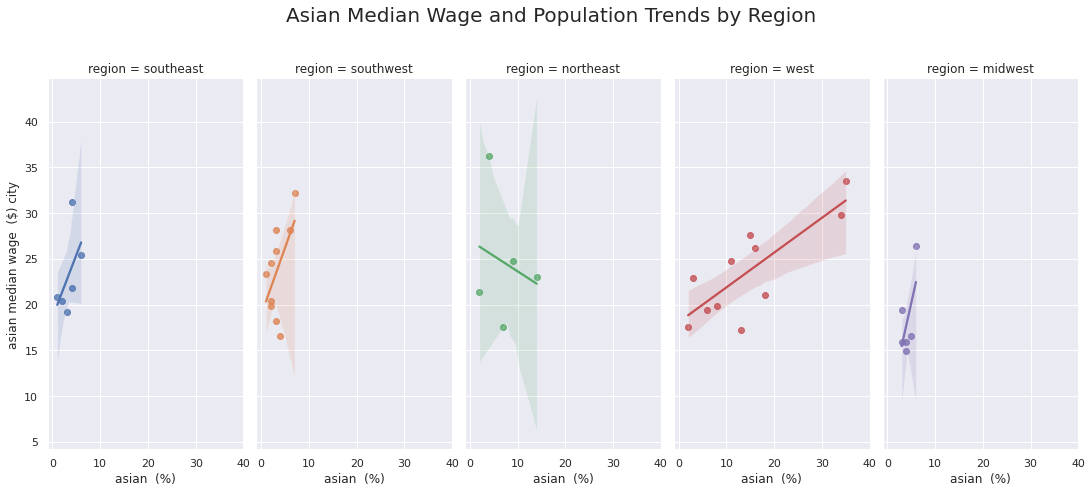

In [142]:
ax = sns.lmplot(x = "asian  (%)", y = "asian median wage  ($) city", hue = "region", col = "region", data = asian, x_ci = "ci",
           height=6, aspect=.5).fig.suptitle("Asian Median Wage and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(-1,40)
plt.ylim()

(-1.0, 40.0)

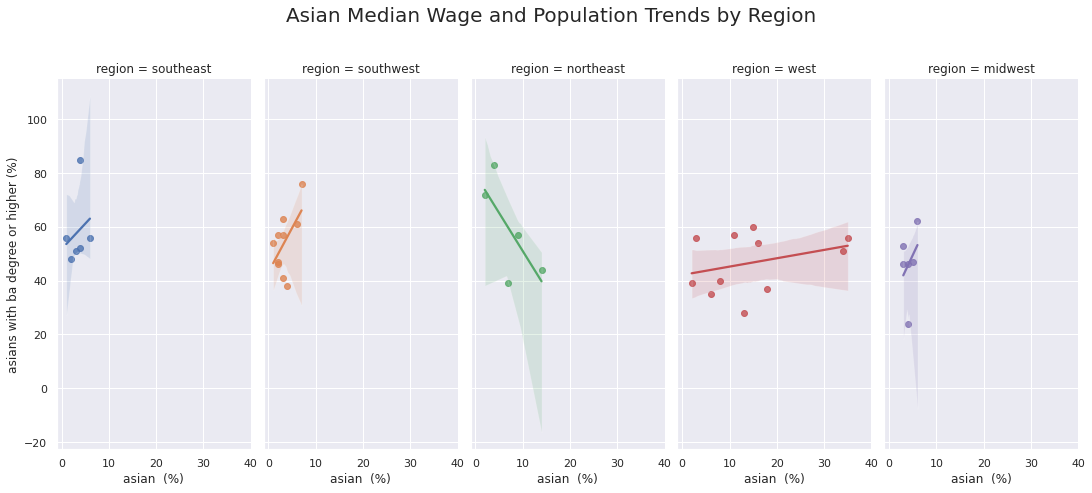

In [143]:
ax = sns.lmplot(x = "asian  (%)", y = "asians with ba degree or higher (%)", hue = "region", col = "region", data = asian,
           height=6, aspect=.5).fig.suptitle("Asian Median Wage and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(-1,40)

In [144]:
asian_west_region = asian.loc[lat["region"]=="west"]
asian_northeast_region = asian.loc[lat["region"]=="northeast"]

a_west_neast = [asian_west_region, asian_northeast_region]
asian_west_neast = pd.concat(a_west_neast)

asian_west_neast = asian_west_neast.sort_values("asians with ba degree or higher (%)")

[Text(0, 0, '28'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '44'),
 Text(0, 0, '51'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '56'),
 Text(0, 0, '57'),
 Text(0, 0, '57'),
 Text(0, 0, '60'),
 Text(0, 0, '72'),
 Text(0, 0, '83')]

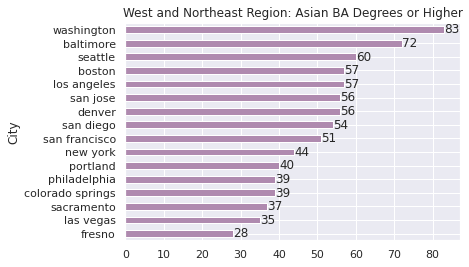

In [145]:
ax = asian_west_neast.plot(x = "city", y = "asians with ba degree or higher (%)", kind = "barh",
                       ylabel = "BA Degree or Higher (%)", xlabel = "City", title = "West and Northeast Region: Asian BA Degrees or Higher",
                       legend = None, color = "#AF8AAF")
ax.bar_label(ax.containers[0], label_type = "edge")

No handles with labels found to put in legend.


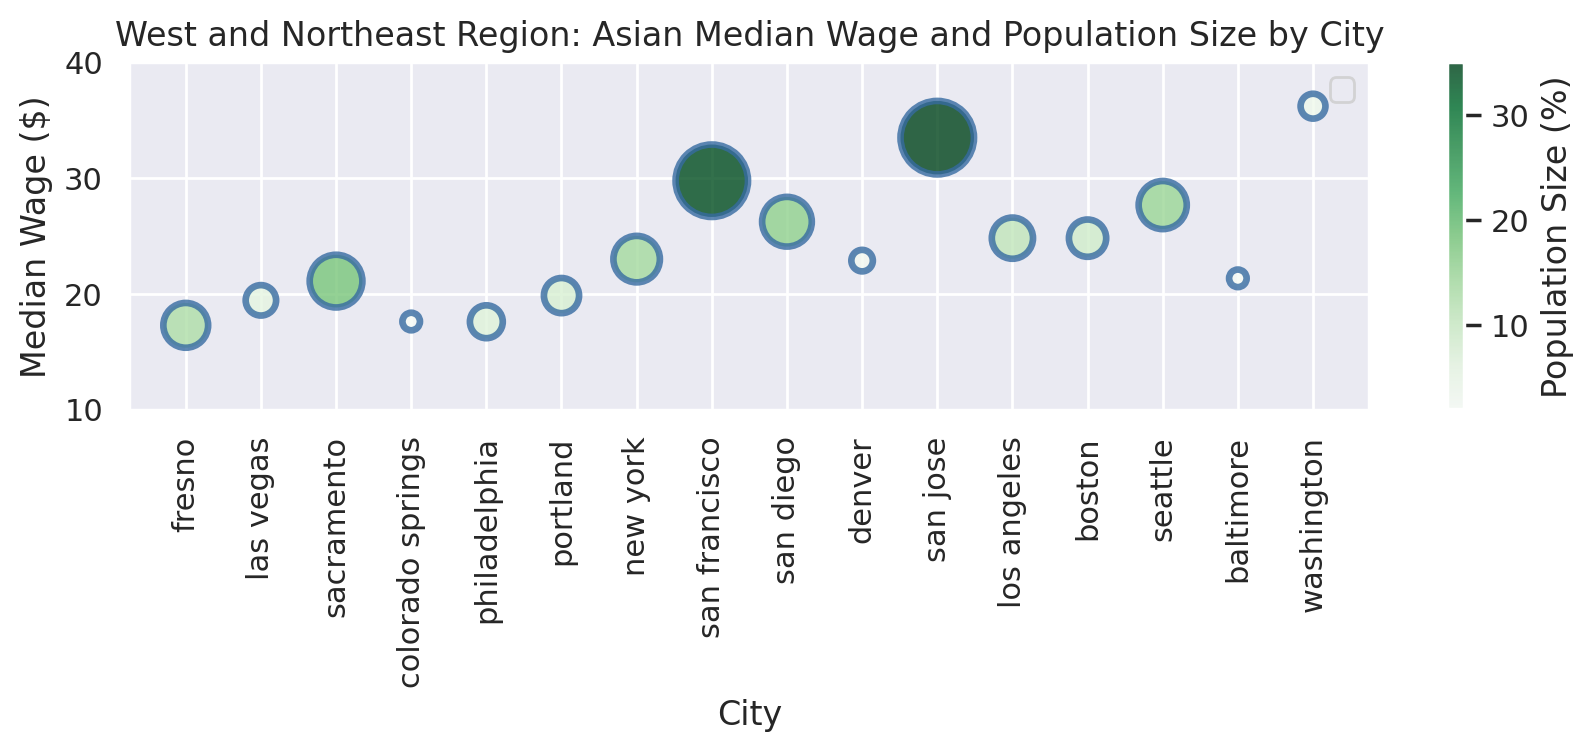

In [146]:
#West and Northeast Region Median Wage and Population Size

x = asian_west_neast["city"]
y = asian_west_neast["asian median wage  ($) city"]
z = asian_west_neast["asian  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 200)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#366BA1", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 40)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West and Northeast Region: Asian Median Wage and Population Size by City")

# show the graph
plt.show()

No handles with labels found to put in legend.


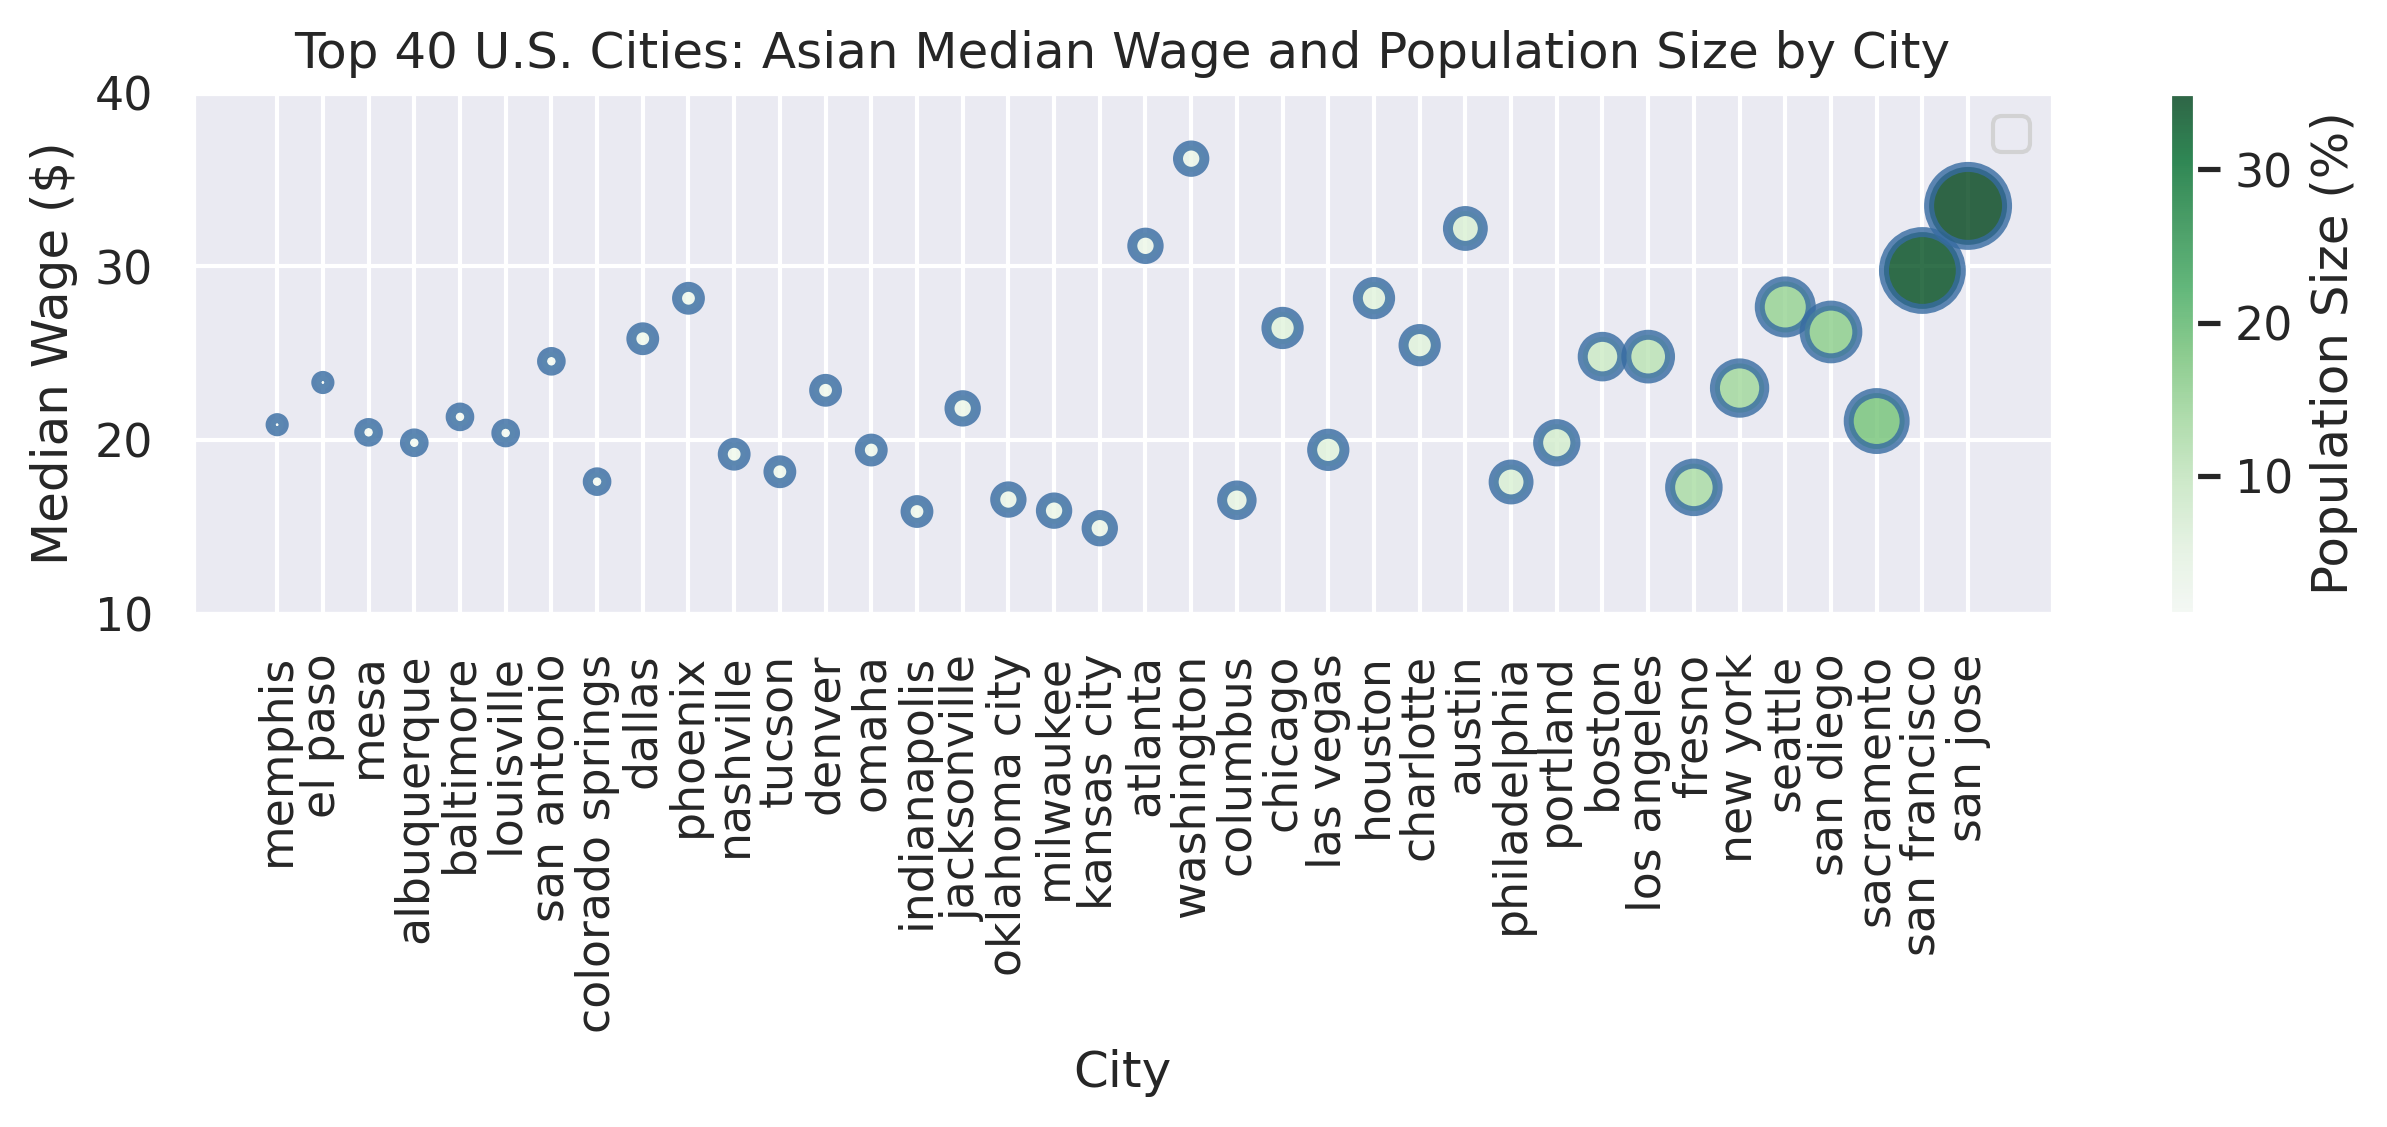

In [147]:
#West and Northeast Region Median Wage and Population Size

x = asian["city"]
y = asian["asian median wage  ($) city"]
z = asian["asian  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 300)
plt.scatter(x, y, s=z*10, alpha=0.8, c = z, edgecolors = "#366BA1", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 40)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Top 40 U.S. Cities: Asian Median Wage and Population Size by City")

# show the graph
plt.show()

# white demographic

In [148]:
white = white_cols.sort_values("white  (%)")
white_region = white.groupby(["region"]).mean("race")
white_region.reset_index(inplace=True)
white_region = white_region.sort_values("white  (%)")
white_region

region  white  (%)  unemployed white (%)  white med income ($) state  \
1  northeast   34.600000              4.000000                94102.000000   
3  southwest   37.545455              4.636364                69648.272727   
0    midwest   41.571429              4.857143                63651.000000   
4       west   44.636364              5.181818                80632.181818   
2  southeast   45.833333              3.833333                59748.666667   

   white  median wage ($) city  whites with ba degree or higher (%)  \
1                    30.970000                            66.800000   
3                    23.641818                            45.181818   
0                    22.092857                            43.000000   
4                    29.550000                            53.909091   
2                    24.188333                            51.333333   

   graduation rate: white (%)  
1                   76.200000  
3                   81.909091  
0                   75.142857  
4                   85.000000  
2                   80.333333

[Text(0, 0, '94102'),
 Text(0, 0, '69648.3'),
 Text(0, 0, '63651'),
 Text(0, 0, '80632.2'),
 Text(0, 0, '59748.7')]

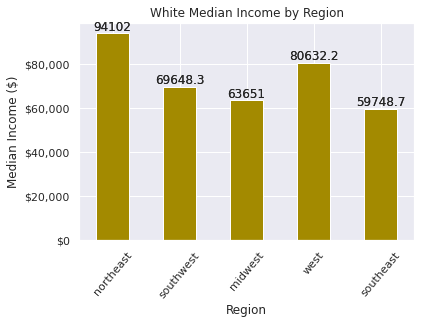

In [149]:
ax = white_region.plot(x = "region", y = "white med income ($) state", kind = "bar", ylabel = "Median Income ($)",
                  xlabel = "Region", title = "White Median Income by Region", legend = None, color = "#A38A00")

ax.bar_label(ax.containers[0], label_type = "edge")
fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=50)



#for bar in df["black med income ( $) state"]:
    #plt.text(bar.format(int(x), ','), yval + .005, yval)
#comma_fmt = ticker(lambda x, p: format(int(x), ','))
ax.bar_label(ax.containers[0], label_type = "edge")

<function matplotlib.pyplot.show(close=None, block=None)>

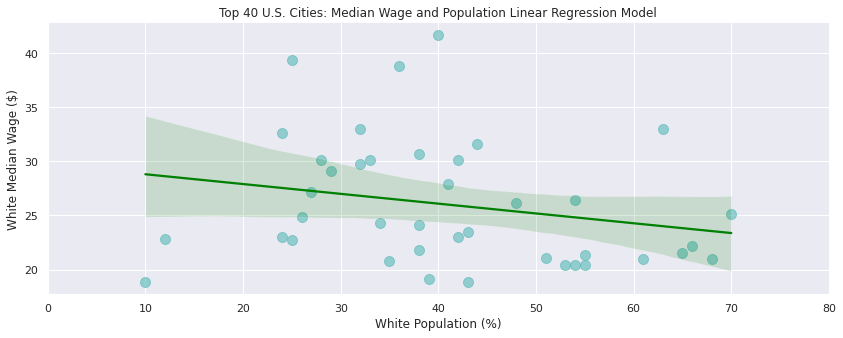

In [206]:
plt.figure(figsize=(14,5))
sns.regplot(x = "white  (%)", y = "white  median wage ($) city", data = white, fit_reg=True,
            scatter_kws = {"color": "#56B8B7", "alpha":0.6, "s":100}, line_kws = {"color": "green"})
plt.xlim(0,80)
plt.title("Top 40 U.S. Cities: Median Wage and Population Linear Regression Model")
plt.xlabel("White Population (%)")
plt.ylabel("White Median Wage ($)")
sns.despine()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

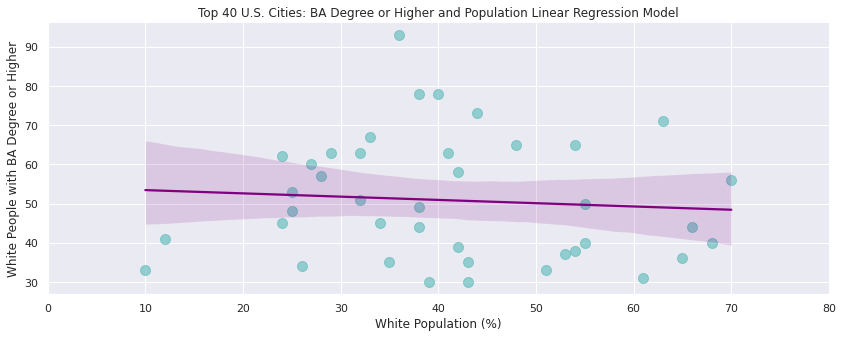

In [207]:
plt.figure(figsize=(14,5))
sns.regplot(x = "white  (%)", y = "whites with ba degree or higher (%)", data = white, fit_reg=True,
            scatter_kws = {"color": "#56B8B7", "alpha":0.6, "s":100}, line_kws = {"color": "purple"})
plt.xlim(0,80)
plt.title("Top 40 U.S. Cities: BA Degree or Higher and Population Linear Regression Model")
plt.xlabel("White Population (%)")
plt.ylabel("White People with BA Degree or Higher")
sns.despine()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

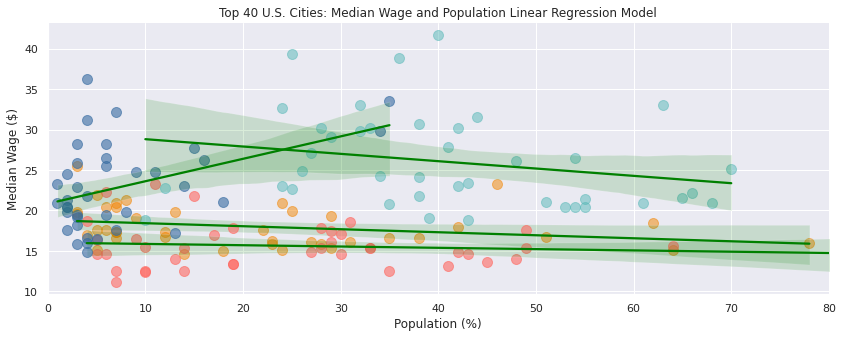

In [151]:
#linear regression for population and median wage
plt.figure(figsize=(14,5))
sns.regplot(x = "black  (%)", y = "black median wage  ($) city", data = black, fit_reg=True, label = black["city"],
            scatter_kws = {"color": "#F28500", "alpha":0.5, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
sns.regplot(x = "hisp_lat  (%)", y = "latino median wage  ($) city", data = lat, fit_reg=True, label = lat["city"],
            scatter_kws = {"color": "#FF6961", "alpha":0.6, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
sns.regplot(x = "asian  (%)", y = "asian median wage  ($) city", data = asian, fit_reg=True, label = asian["city"],
            scatter_kws = {"color": "#366BA1", "alpha":0.6, "s":100 },
            line_kws = {"color": "green"}) #"label": "regression line"})
sns.regplot(x = "white  (%)", y = "white  median wage ($) city", data = white, fit_reg=True,
            scatter_kws = {"color": "#56B8B7", "alpha":0.5, "s":100}, line_kws = {"color": "green"})
plt.xlim(0,80)
plt.title("Top 40 U.S. Cities: Median Wage and Population Linear Regression Model")
plt.xlabel("Population (%)")
plt.ylabel("Median Wage ($)")
#plt.legend(loc = "best")
sns.despine()
plt.show

(0.0, 80.0)

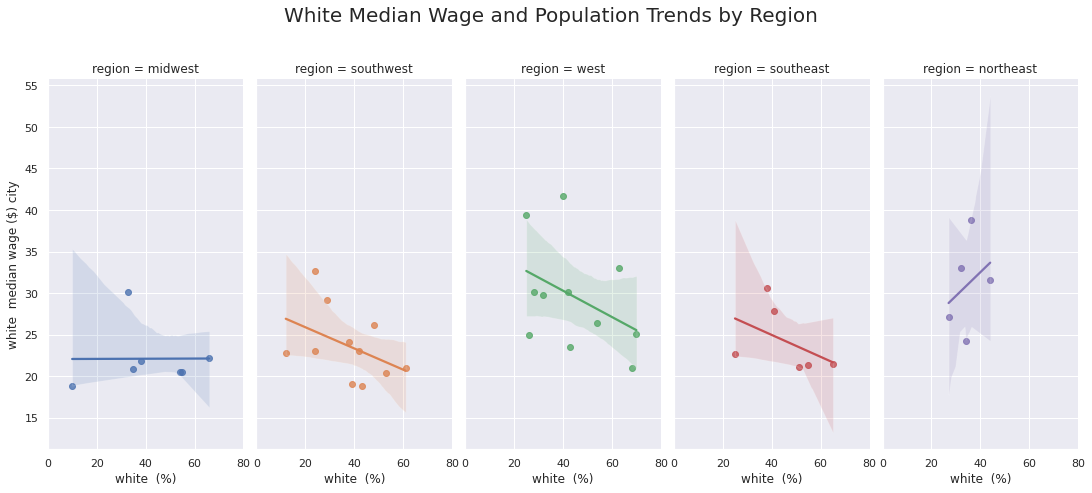

In [82]:
ax = sns.lmplot(x = "white  (%)", y = "white  median wage ($) city", hue = "region", col = "region", data = white,
           height=6, aspect=.5).fig.suptitle("White Median Wage and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(0,80)

(0.0, 80.0)

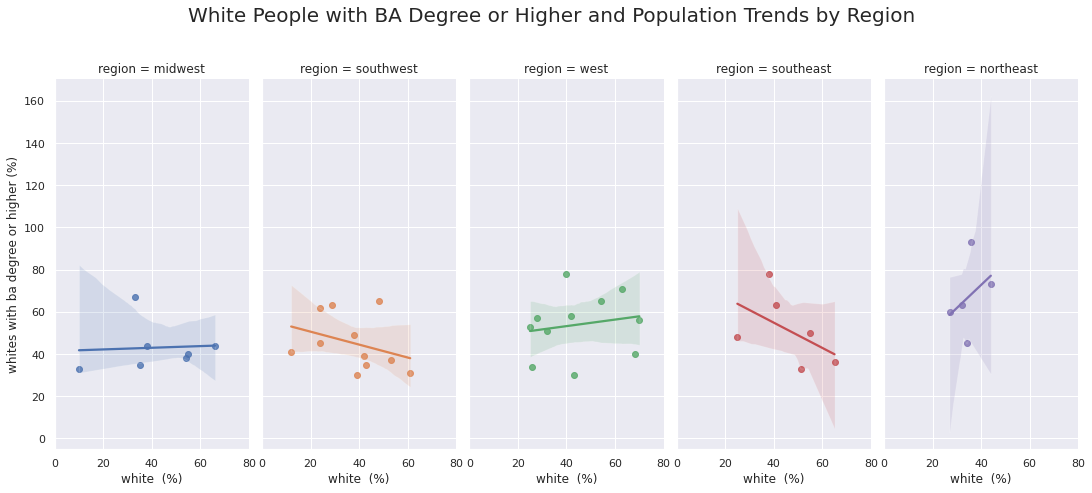

In [83]:
ax = sns.lmplot(x = "white  (%)", y = "whites with ba degree or higher (%)", hue = "region", col = "region", data = white,
           height=6, aspect=.5).fig.suptitle("White People with BA Degree or Higher and Population Trends by Region", y = 1.1, fontsize = 20)
plt.xlim(0,80)

In [86]:
white_west_region = white.loc[white["region"]=="west"]
white_northeast_region = white.loc[white["region"]=="northeast"]

In [88]:
w_west_neast = [white_west_region, white_northeast_region]
white_west_neast = pd.concat(w_west_neast)

white_west_neast = white_west_neast.sort_values("whites with ba degree or higher (%)")

No handles with labels found to put in legend.


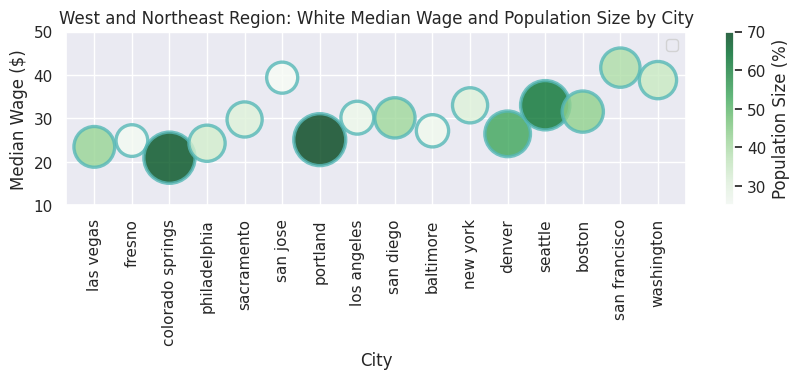

In [93]:
x = white_west_neast["city"]
y = white_west_neast["white  median wage ($) city"]
z = white_west_neast["white  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.3), dpi = 100)
plt.scatter(x, y, s=z*20, alpha=0.8, c = z, edgecolors = "#56B8B7", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 50)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("West and Northeast Region: White Median Wage and Population Size by City")

# show the graph
plt.show()

No handles with labels found to put in legend.


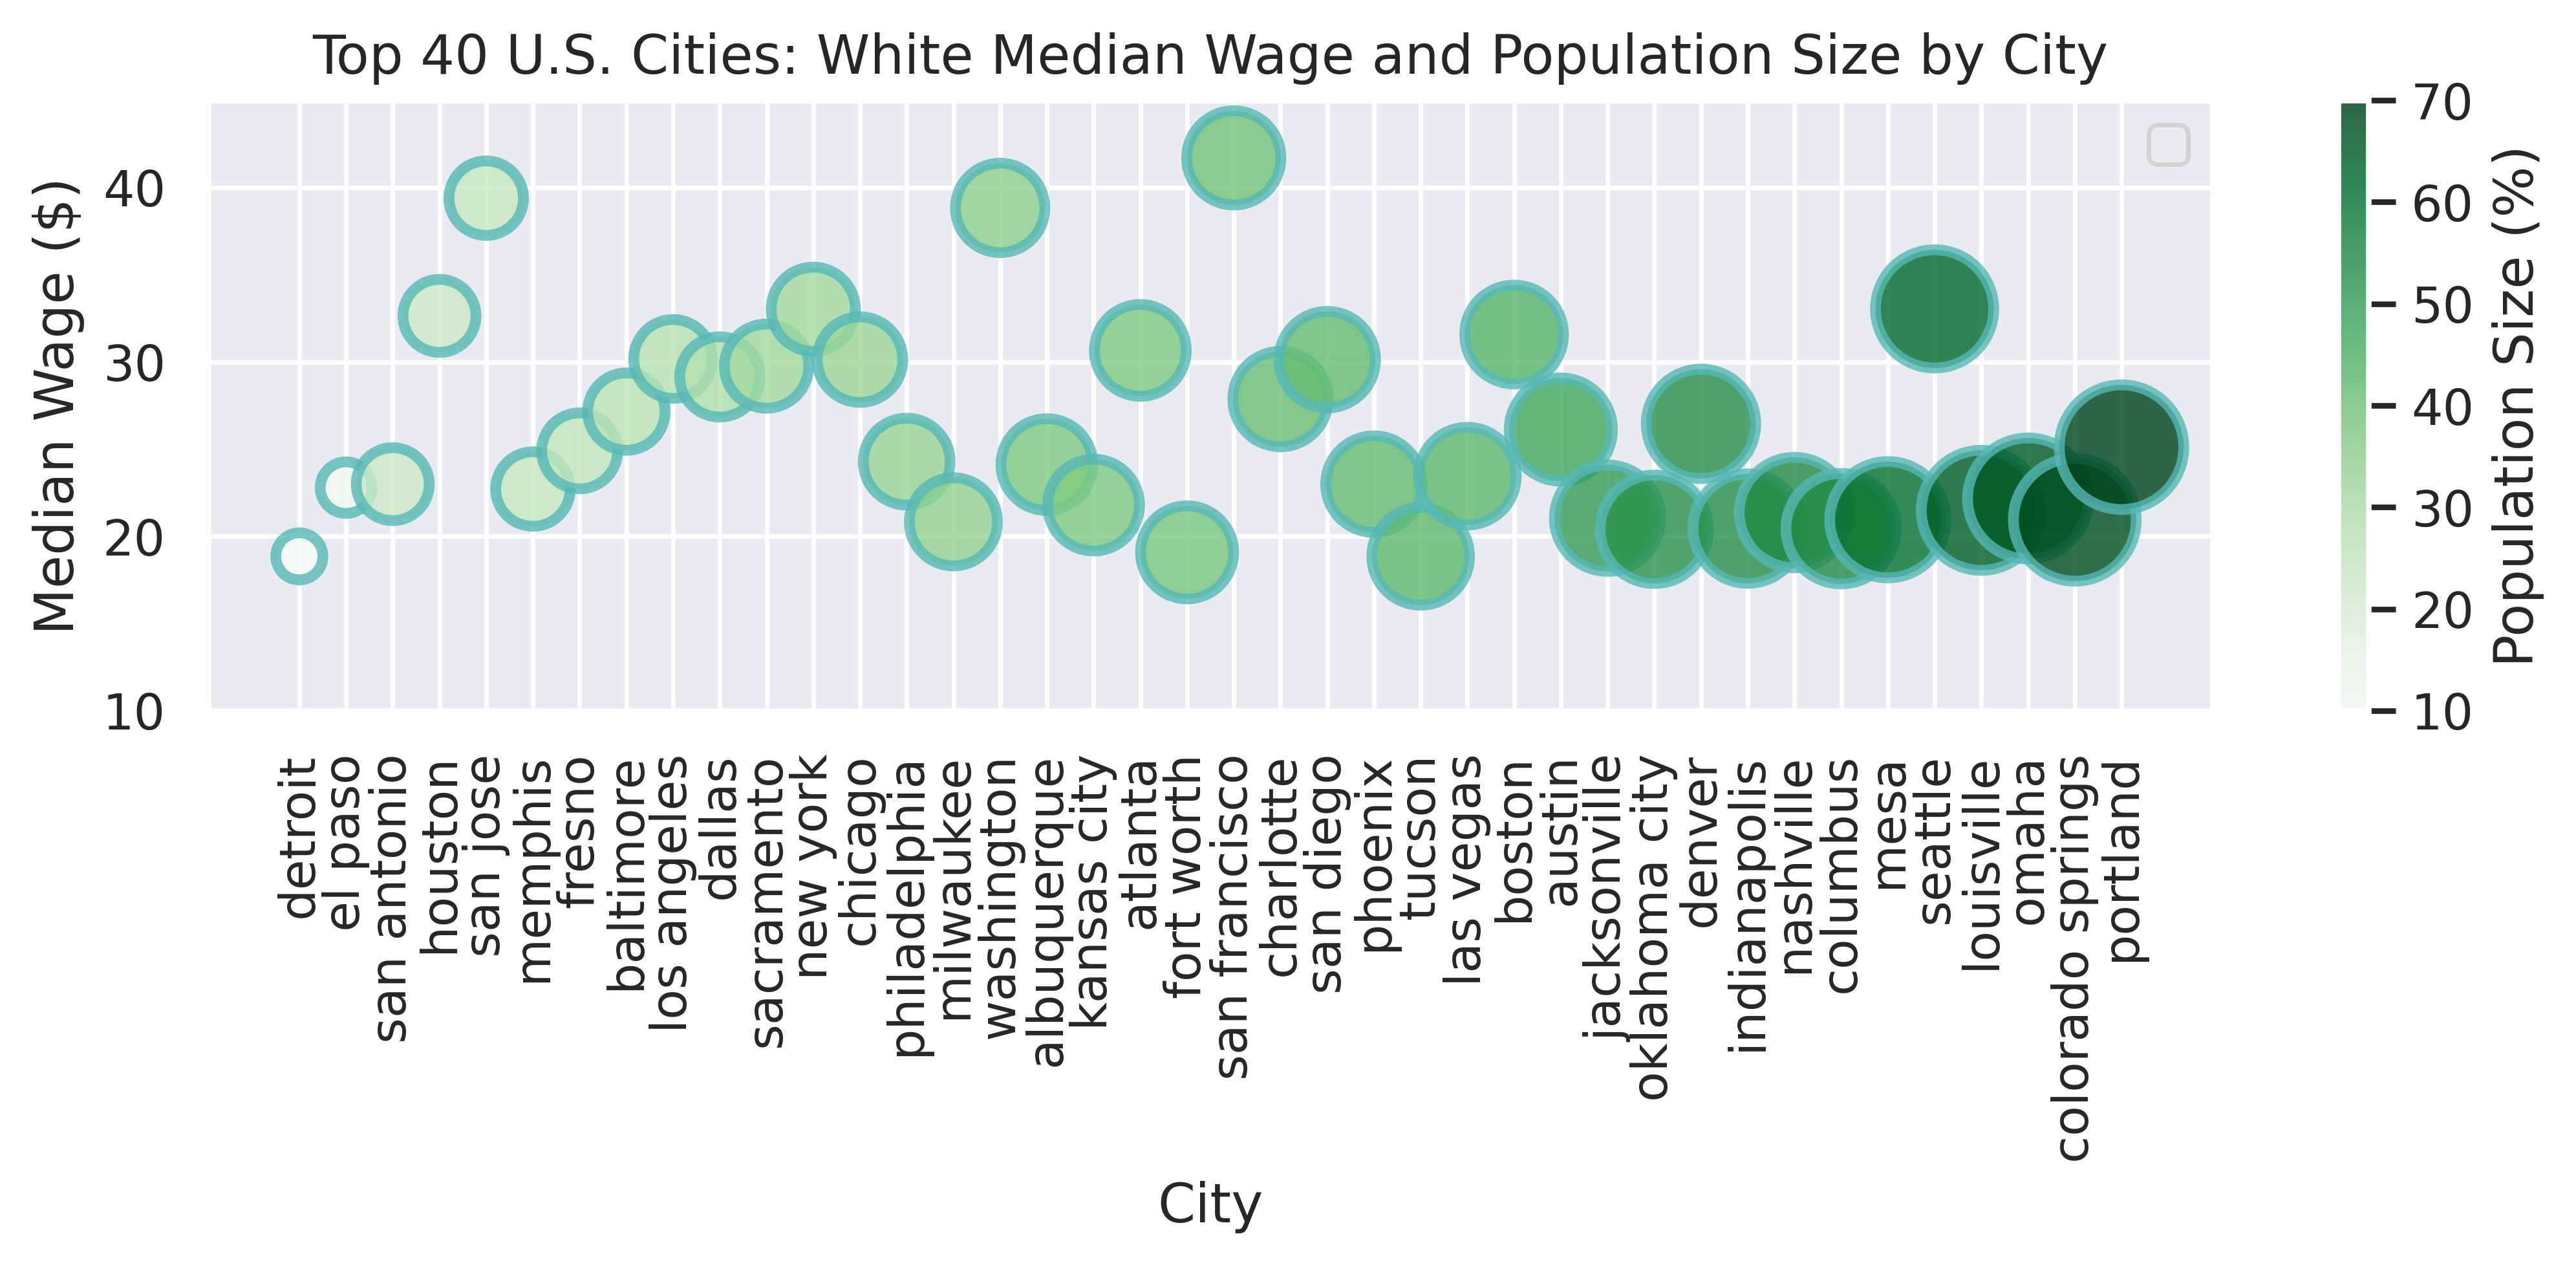

In [152]:
white = white.sort_values("white  (%)")

x = white["city"]
y = white["white  median wage ($) city"]
z = white["white  (%)"]



# use the scatter function
plt.figure(figsize = (10,2.5), dpi = 500)
plt.scatter(x, y, s=z*11, alpha=0.8, c = z, edgecolors = "#56B8B7", cmap = "Greens", linewidth = 2.4)
cbar = plt.colorbar()
cbar.set_label("Population Size (%)")
plt.xticks(rotation = 90)

plt.ylim(10, 45)
plt.xlabel("City")
plt.ylabel("Median Wage ($)")
plt.legend()
plt.title("Top 40 U.S. Cities: White Median Wage and Population Size by City")

# show the graph
plt.show()

In [160]:
black_west_region = black.loc[black["region"]=="west"]
black_midwest_region = black.loc[black["region"]=="midwest"]
black_southwest_region = black.loc[black["region"]=="southwest"]
black_southeast_region = black.loc[black["region"]=="southeast"]
black_northeast_region = black.loc[black["region"]=="northeast"]

asian_west_region = asian.loc[black["region"]=="west"]
asian_midwest_region = asian.loc[black["region"]=="midwest"]
asian_southwest_region = asian.loc[black["region"]=="southwest"]
asian_southeast_region = asian.loc[black["region"]=="southeast"]
asian_northeast_region = asian.loc[black["region"]=="northeast"]

lat_west_region = lat.loc[black["region"]=="west"]
lat_midwest_region = lat.loc[black["region"]=="midwest"]
lat_southwest_region = lat.loc[black["region"]=="southwest"]
lat_southeast_region = lat.loc[black["region"]=="southeast"]
lat_northeast_region = lat.loc[black["region"]=="northeast"]

white_west_region = white.loc[black["region"]=="west"]
white_midwest_region = white.loc[black["region"]=="midwest"]
white_southwest_region = white.loc[black["region"]=="southwest"]
white_southeast_region = white.loc[black["region"]=="southeast"]
white_northeast_region = white.loc[black["region"]=="northeast"]

Text(0.5, 1.0, 'West Region: Histogram of Median Wage for All Demographics')

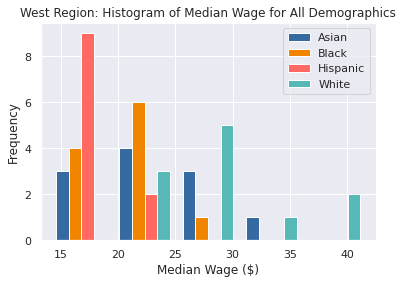

In [161]:
Asian = asian_west_region["asian median wage  ($) city"]
Black = black_west_region["black median wage  ($) city"]
Hispanic = lat_west_region["latino median wage  ($) city"]
White = white_west_region["white  median wage ($) city"]

colors = ["#366BA1", "#F28500", "#FF6961", "#56B8B7"]
names = ["Asian", "Black", "Hispanic", "White"]

plt.hist([Asian, Black, Hispanic, White], bins = 5, color = colors, label=names)

#xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
#g.set_xticklabels(xlabels)

plt.legend()
plt.xlabel("Median Wage ($)")
plt.ylabel("Frequency")
plt.title("West Region: Histogram of Median Wage for All Demographics")

No handles with labels found to put in legend.


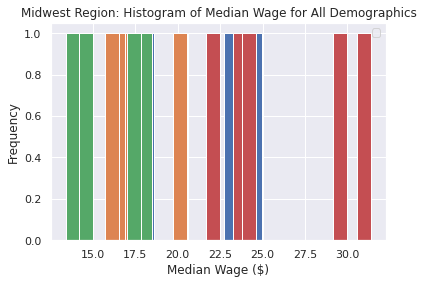

In [172]:
plt.bar(x = asian_region["asian median wage  ($) city"], height = 1 )
plt.bar(x = black_region["black median wage  ($) city"], height = 1  )
plt.bar(x = lat_region["latino median wage  ($) city"], height = 1  )
plt.bar(x = white_region["white  median wage ($) city"], height = 1  )


plt.xlabel("Median Wage ($)")
plt.ylabel("Frequency")
plt.title("Midwest Region: Histogram of Median Wage for All Demographics")
plt.legend()

In [174]:
Asian = asian["asian median wage  ($) city"]
Black = black["black median wage  ($) city"]
Hispanic = lat["latino median wage  ($) city"]
White = white["white  median wage ($) city"]

colors = ["#366BA1", "#F28500", "#FF6961", "#56B8B7"]
names = ["Asian", "Black", "Hispanic", "White"]

plt.his([Asian, Black, Hispanic, White], bins = 5, color = colors, label=names)

#xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
#g.set_xticklabels(xlabels)

plt.legend()
plt.xlabel("Median Wage ($)")
plt.ylabel("Frequency")
plt.title("Histogram: Median Wage for All Demographics")

TypeError: scatter() missing 1 required positional argument: 'y'

In [167]:
asian_region,
black_region
lat_region
white_region

region  white  (%)  unemployed white (%)  white med income ($) state  \
1  northeast   34.600000              4.000000                94102.000000   
3  southwest   37.545455              4.636364                69648.272727   
0    midwest   41.571429              4.857143                63651.000000   
4       west   44.636364              5.181818                80632.181818   
2  southeast   45.833333              3.833333                59748.666667   

   white  median wage ($) city  whites with ba degree or higher (%)  \
1                    30.970000                            66.800000   
3                    23.641818                            45.181818   
0                    22.092857                            43.000000   
4                    29.550000                            53.909091   
2                    24.188333                            51.333333   

   graduation rate: white (%)  
1                   76.200000  
3                   81.909091  
0                   75.142857  
4                   85.000000  
2                   80.333333

In [196]:
asian_region = asian_region[["region", "asian median wage  ($) city"]]
black_region = black_region[["region", "black median wage  ($) city"]]
lat_region = lat_region[["region", "latino median wage  ($) city"]]
white_region = white_region[["region", "white  median wage ($) city"]]

asian_region.sort_values("region")
black_region.sort_values("region")
lat_region.sort_values("region")
white_region.sort_values("region")

region  white  median wage ($) city
0    midwest                    22.092857
1  northeast                    30.970000
2  southeast                    24.188333
3  southwest                    23.641818
4       west                    29.550000

In [203]:
asian_region["black median wage"] = black_region["black median wage  ($) city"]
#asian_region["hisp_lat median wage"] = lat_region["latino median wage  ($) city"]
asian_region["white median wage"] = white_region["white  median wage ($) city"]
asian_region

region  asian median wage  ($) city  black median wage  \
0    midwest                    18.188333          16.518571   
1  northeast                    24.580000          20.120000   
2  southeast                    23.153333          16.116667   
3  southwest                    23.720000          16.816364   
4       west                    23.637273          20.187273   

   latino median wage  white median wage  hisp_lat median wage  
0           13.837143          22.092857             13.837143  
1           18.090000          30.970000             18.090000  
2           14.171667          24.188333             14.171667  
3           14.606364          23.641818             14.606364  
4           17.442727          29.550000             17.442727

region  asian median wage  ($) city  black median wage  \
0    midwest                    18.188333          16.518571   
1  northeast                    24.580000          20.120000   
2  southeast                    23.153333          16.116667   
3  southwest                    23.720000          16.816364   
4       west                    23.637273          20.187273   

   latino median wage  white median wage  hisp_lat median wage  
0           13.837143          22.092857             13.837143  
1           18.090000          30.970000             18.090000  
2           14.171667          24.188333             14.171667  
3           14.606364          23.641818             14.606364  
4           17.442727          29.550000             17.442727

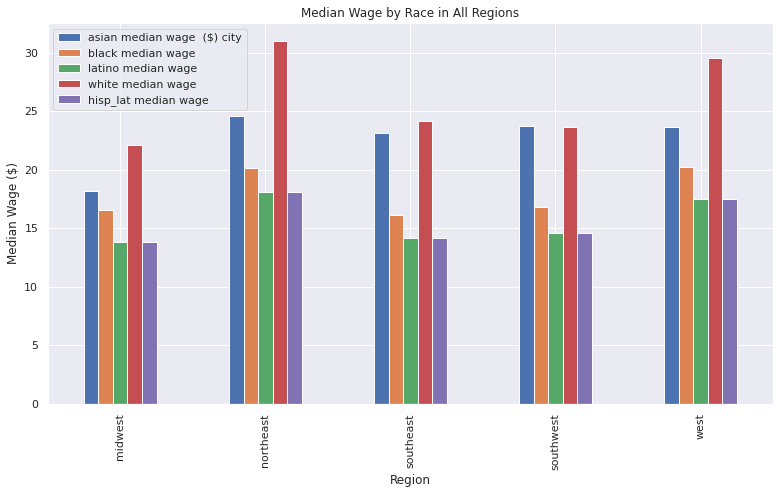

In [201]:
asian_region.sort_values("hisp_lat median wage")
asian_region.plot(x = "region", kind = "bar", xlabel = "Region", ylabel = "Median Wage ($)", 
                 figsize =(13,7), title = "Median Wage by Race in All Regions")
asian_region

In [192]:
black_region

region  black median wage  ($) city
4       west                    20.187273
3  southwest                    16.816364
0    midwest                    16.518571
2  southeast                    16.116667
1  northeast                    20.120000

In [191]:
regions = [asian_region, black_region, lat_region, white_region]
all_regions = pd.concat(regions)
all_regions

region  asian median wage  ($) city  black median wage  ($) city  \
0    midwest                    18.188333                          NaN   
1  northeast                    24.580000                          NaN   
2  southeast                    23.153333                          NaN   
3  southwest                    23.720000                          NaN   
4       west                    23.637273                          NaN   
4       west                          NaN                    20.187273   
3  southwest                          NaN                    16.816364   
0    midwest                          NaN                    16.518571   
2  southeast                          NaN                    16.116667   
1  northeast                          NaN                    20.120000   
2  southeast                          NaN                          NaN   
1  northeast                          NaN                          NaN   
0    midwest                          NaN                          NaN   
4       west                          NaN                          NaN   
3  southwest                          NaN                          NaN   
1  northeast                          NaN                          NaN   
3  southwest                          NaN                          NaN   
0    midwest                          NaN                          NaN   
4       west                          NaN                          NaN   
2  southeast                          NaN                          NaN   

   latino median wage  ($) city  white  median wage ($) city  
0                           NaN                          NaN  
1                           NaN                          NaN  
2                           NaN                          NaN  
3                           NaN                          NaN  
4                           NaN                          NaN  
4                           NaN                          NaN  
3                           NaN                          NaN  
0                           NaN                          NaN  
2                           NaN                          NaN  
1                           NaN                          NaN  
2                     14.171667                          NaN  
1                     18.090000                          NaN  
0                     13.837143                          NaN  
4                     17.442727                          NaN  
3                     14.606364                          NaN  
1                           NaN                    30.970000  
3                           NaN                    23.641818  
0                           NaN                    22.092857  
4                           NaN                    29.550000  
2                           NaN                    24.188333